In [ ]:
# # load
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

# Load the data splits
X_train = pd.read_csv('/content/drive/MyDrive/apt/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/apt/y_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/apt/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/apt/y_val.csv')
X_test = pd.read_csv('/content/drive/MyDrive/apt/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/apt/y_test.csv')

import pickle

# Load training history
with open('/content/drive/MyDrive/apt/training_history.pkl', 'rb') as f:
    history = pickle.load(f)


import pandas as pd

# Load the new, already-normalized test file
df_new = pd.read_csv('/content/drive/MyDrive/apt/testing_cleaned.csv')

# Separate target and features
y_new = df_new['label']  # Target variable (0 = Normal, 1 = APT)
X_new = df_new.drop(columns=['label', 'attack_cat'])  # Drop non-feature columns


from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/apt/mlp.h5')

In [ ]:
# save



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/apt')


[]

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/content/drive/MyDrive/apt/train_data.csv'
df = pd.read_csv(file_path)

# Features: Drop 'label' and 'attack_cat' columns
X = df.drop(columns=['label', 'attack_cat'])  # Features (drop label and attack_cat)
y = df['label']  # Target (label column)

# Split into Train (70%), Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remaining 30% into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Save the splits for later use
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data split completed! Check your files.")


Data split completed! Check your files.


 Normalize features using Min-Max Scaling (0 to 1).

In [ ]:
import pandas as pd
import numpy as np

# Load processed data
X_train = pd.read_csv('X_train.csv').values  # Convert to NumPy array
X_val = pd.read_csv('X_val.csv').values
X_test = pd.read_csv('X_test.csv').values

# Check for missing values
print("Missing values in Train:", np.isnan(X_train).sum())
print("Missing values in Validation:", np.isnan(X_val).sum())
print("Missing values in Test:", np.isnan(X_test).sum())

# Check min-max range
print("Train Data Min:", X_train.min(), "Max:", X_train.max())
print("Validation Data Min:", X_val.min(), "Max:", X_val.max())
print("Test Data Min:", X_test.min(), "Max:", X_test.max())


Missing values in Train: 0
Missing values in Validation: 0
Missing values in Test: 0
Train Data Min: 0.0 Max: 1.0
Validation Data Min: 0.0 Max: 1.0
Test Data Min: 0.0 Max: 1.0


 Creates an MLP model with 2 hidden layers.

 Defines the activation functions (ReLU for hidden, Sigmoid for output).

 Chooses an optimizer (Adam) and loss function (Binary Cross-Entropy).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get input feature count
input_dim = X_train.shape[1]  # Number of features

# Define MLP model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),  # Hidden Layer 1
    layers.Dense(32, activation='relu'),  # Hidden Layer 2
    layers.Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the Model
Now that the model is built, we’ll train it using the dataset.

What Happens During Training?

The model will learn patterns from X_train_scaled.npy and y_train.npy.

It will validate performance on X_val_scaled.npy and y_val.npy.

After each training pass (epoch), it will adjust its weights to improve predictions.



In [ ]:
import pandas as pd

# Load training and validation data from CSV
X_train = pd.read_csv('X_train.csv').values  # Features for training
y_train = pd.read_csv('y_train.csv').values  # Labels for training
X_val = pd.read_csv('X_val.csv').values      # Features for validation
y_val = pd.read_csv('y_val.csv').values      # Labels for validation

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_val, y_val),  # Validation data
    epochs=20,  # Number of passes over the dataset
    batch_size=32,  # Number of samples per update step
    verbose=1  # Shows training progress
)

# Save trained model
model.save("/content/drive/MyDrive/apt/mlp.h5")

print("Training complete! Model saved as 'mlp.h5'")


Epoch 1/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8158 - loss: 0.4259 - val_accuracy: 0.8799 - val_loss: 0.2828
Epoch 2/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8800 - loss: 0.2798 - val_accuracy: 0.8825 - val_loss: 0.2742
Epoch 3/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8829 - loss: 0.2751 - val_accuracy: 0.8837 - val_loss: 0.2677
Epoch 4/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8872 - loss: 0.2644 - val_accuracy: 0.8843 - val_loss: 0.2680
Epoch 5/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8855 - loss: 0.2633 - val_accuracy: 0.8848 - val_loss: 0.2673
Epoch 6/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8847 - loss: 0.2663 - val_accuracy: 0.8852 - val_loss: 0.2606
Epoch 7/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.2595 - val_accuracy: 0.8850 - val_loss: 0.2634
Epoch 8/20
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8871 - loss: 0.2576 - 

Training complete! Model saved as 'mlp.h5'


Step 5: Evaluate the Model on the Validation Set

In [ ]:
# Load validation data (this should be done before the next step)
X_val = pd.read_csv('X_val.csv').values  # Features for validation
y_val = pd.read_csv('y_val.csv').values  # Labels for validation

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)

# Print validation results
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.2320
Validation Loss: 0.2399
Validation Accuracy: 0.8878


Step 6: Evaluate the Model on the Test Set

In [ ]:
# Load test data
X_test = pd.read_csv('X_test.csv').values  # Features for testing
y_test = pd.read_csv('y_test.csv').values  # Labels for testing

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.2435
Test Loss: 0.2465
Test Accuracy: 0.8817


Step 7: Testing on a New, bigfat, Unseen File

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/apt/testing_cleaned.csv')

# Preprocess the data (same as the training data)
X_new = new_data.drop(columns=['label', 'attack_cat'])  # Remove target variable and other irrelevant columns
y_new = new_data['label']  # Assuming 'label' is the target variable

# Check the shape and structure of the new data (just for sanity check)
print(f"New data shape: {X_new.shape}")

# Make predictions on the new data
predictions = model.predict(X_new)

# Convert predictions to binary labels (if using a sigmoid activation)
predicted_labels = (predictions > 0.5).astype(int)

# Evaluate model on new data (accuracy, confusion matrix, etc.)
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_new, predicted_labels)
print(f"Accuracy on new data: {accuracy:.4f}")

# Confusion matrix (optional)
cm = confusion_matrix(y_new, predicted_labels)
print(f"Confusion Matrix:\n{cm}")


New data shape: (40849, 10)
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy on new data: 0.7087
Confusion Matrix:
[[13714 11761]
 [  140 15234]]


save data before closing notebook

In [ ]:
import pickle
import pandas as pd

# Convert NumPy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_val_df = pd.DataFrame(X_val)
y_val_df = pd.DataFrame(y_val)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# Save them to Google Drive
X_train_df.to_csv('/content/drive/MyDrive/apt/X_train.csv', index=False)
y_train_df.to_csv('/content/drive/MyDrive/apt/y_train.csv', index=False)
X_val_df.to_csv('/content/drive/MyDrive/apt/X_val.csv', index=False)
y_val_df.to_csv('/content/drive/MyDrive/apt/y_val.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/apt/X_test.csv', index=False)
y_test_df.to_csv('/content/drive/MyDrive/apt/y_test.csv', index=False)


# Save training history
with open('/content/drive/MyDrive/apt/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


loading data

In [ ]:
import pandas as pd

# Load the data splits
X_train = pd.read_csv('/content/drive/MyDrive/apt/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/apt/y_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/apt/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/apt/y_val.csv')
X_test = pd.read_csv('/content/drive/MyDrive/apt/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/apt/y_test.csv')

load training history

In [ ]:
import pickle

# Load training history
with open('/content/drive/MyDrive/apt/training_history.pkl', 'rb') as f:
    history = pickle.load(f)


In [ ]:
import pandas as pd

# Load the new, already-normalized test file
df_new = pd.read_csv('/content/drive/MyDrive/apt/testing_cleaned.csv')

# Separate target and features
y_new = df_new['label']  # Target variable (0 = Normal, 1 = APT)
X_new = df_new.drop(columns=['label', 'attack_cat'])  # Drop non-feature columns


load model

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/apt/mlp.h5')

REDUCING FALSE POSITIVES.

step 1: threshold tuning

thresh 0.5

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict raw probabilities (between 0 and 1)
y_pred_probs = model.predict(X_new)

# Apply custom threshold
custom_threshold = 0.5
y_pred_custom = (y_pred_probs >= custom_threshold).astype(int)

# Evaluate performance
print("Accuracy:", accuracy_score(y_new, y_pred_custom))  # Use y_new as the true labels
print("Confusion Matrix:\n", confusion_matrix(y_new, y_pred_custom))  # Use y_new
print("\nClassification Report:\n", classification_report(y_new, y_pred_custom))  # Use y_new


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.7086587186956841
Confusion Matrix:
 [[13714 11761]
 [  140 15234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70     25475
           1       0.56      0.99      0.72     15374

    accuracy                           0.71     40849
   macro avg       0.78      0.76      0.71     40849
weighted avg       0.83      0.71      0.71     40849



thresh = 0.6

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict raw probabilities (between 0 and 1)
y_pred_probs = model.predict(X_new)

# Apply custom threshold (e.g., 0.6)
custom_threshold = 0.6
y_pred_custom = (y_pred_probs >= custom_threshold).astype(int)

# Evaluate performance
print("Accuracy:", accuracy_score(y_new, y_pred_custom))  # Use y_new as the true labels
print("Confusion Matrix:\n", confusion_matrix(y_new, y_pred_custom))  # Use y_new
print("\nClassification Report:\n", classification_report(y_new, y_pred_custom))  # Use y_new


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.7170554970745918
Confusion Matrix:
 [[14278 11197]
 [  361 15013]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.56      0.71     25475
           1       0.57      0.98      0.72     15374

    accuracy                           0.72     40849
   macro avg       0.77      0.77      0.72     40849
weighted avg       0.82      0.72      0.72     40849



thresh 0.7

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict raw probabilities (between 0 and 1)
y_pred_probs = model.predict(X_new)

# Apply custom threshold (e.g., 0.7)
custom_threshold = 0.7
y_pred_custom = (y_pred_probs >= custom_threshold).astype(int)

# Evaluate performance
print("Accuracy:", accuracy_score(y_new, y_pred_custom))  # Use y_new as the true labels
print("Confusion Matrix:\n", confusion_matrix(y_new, y_pred_custom))  # Use y_new
print("\nClassification Report:\n", classification_report(y_new, y_pred_custom))  # Use y_new


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.7333594457636662
Confusion Matrix:
 [[15454 10021]
 [  871 14503]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.61      0.74     25475
           1       0.59      0.94      0.73     15374

    accuracy                           0.73     40849
   macro avg       0.77      0.77      0.73     40849
weighted avg       0.81      0.73      0.73     40849



actual work to reduce false +ves i think---

STEP 1 : analysze data and model

Examine misclassified samples to identify patterns

Look specifically at false positives (normal traffic classified as attacks)
Check if certain types of normal traffic are consistently misclassified

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[3431 1010]
 [  95 4808]]

True Negatives: 3431 (Correctly identified normal traffic)
False Positives: 1010 (Normal traffic misclassified as attacks)
False Negatives: 95 (Attacks misclassified as normal traffic)
True Positives: 4808 (Correctly identified attacks)

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.77      0.86      4441
         APT       0.83      0.98      0.90      4903

    accuracy                           0.88      9344
   macro avg       0.90      0.88      0.88      9344
weighted avg       0.90      0.88      0.88      9344



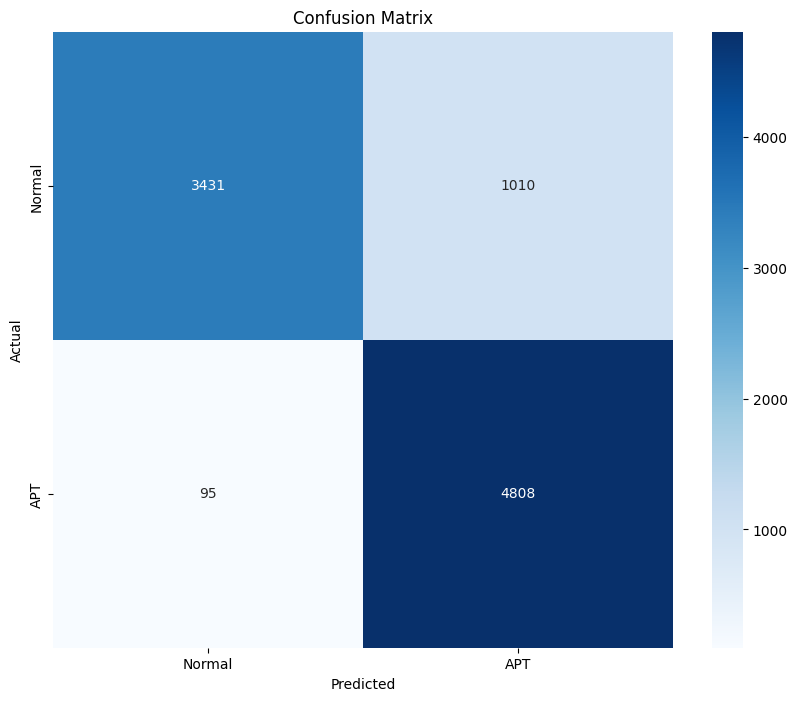


Number of false positives: 1010

Top features that differ most between false positives and normal traffic:
  Feature  Mean_Value_FP  Mean_Value_Normal  Difference
4       4       0.075256           0.496897    0.421640
0       0       0.387102           0.038173    0.348929
3       3       0.409800           0.072768    0.337032
8       8       0.473177           0.798150    0.324973
2       2       0.567093           0.872125    0.305032
5       5       0.356024           0.106227    0.249797
7       7       0.324443           0.168229    0.156214
1       1       0.659977           0.805906    0.145929
6       6       0.449238           0.341836    0.107403
9       9       0.443692           0.497104    0.053412


<ipython-input-16-1106257f50a6>:81: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


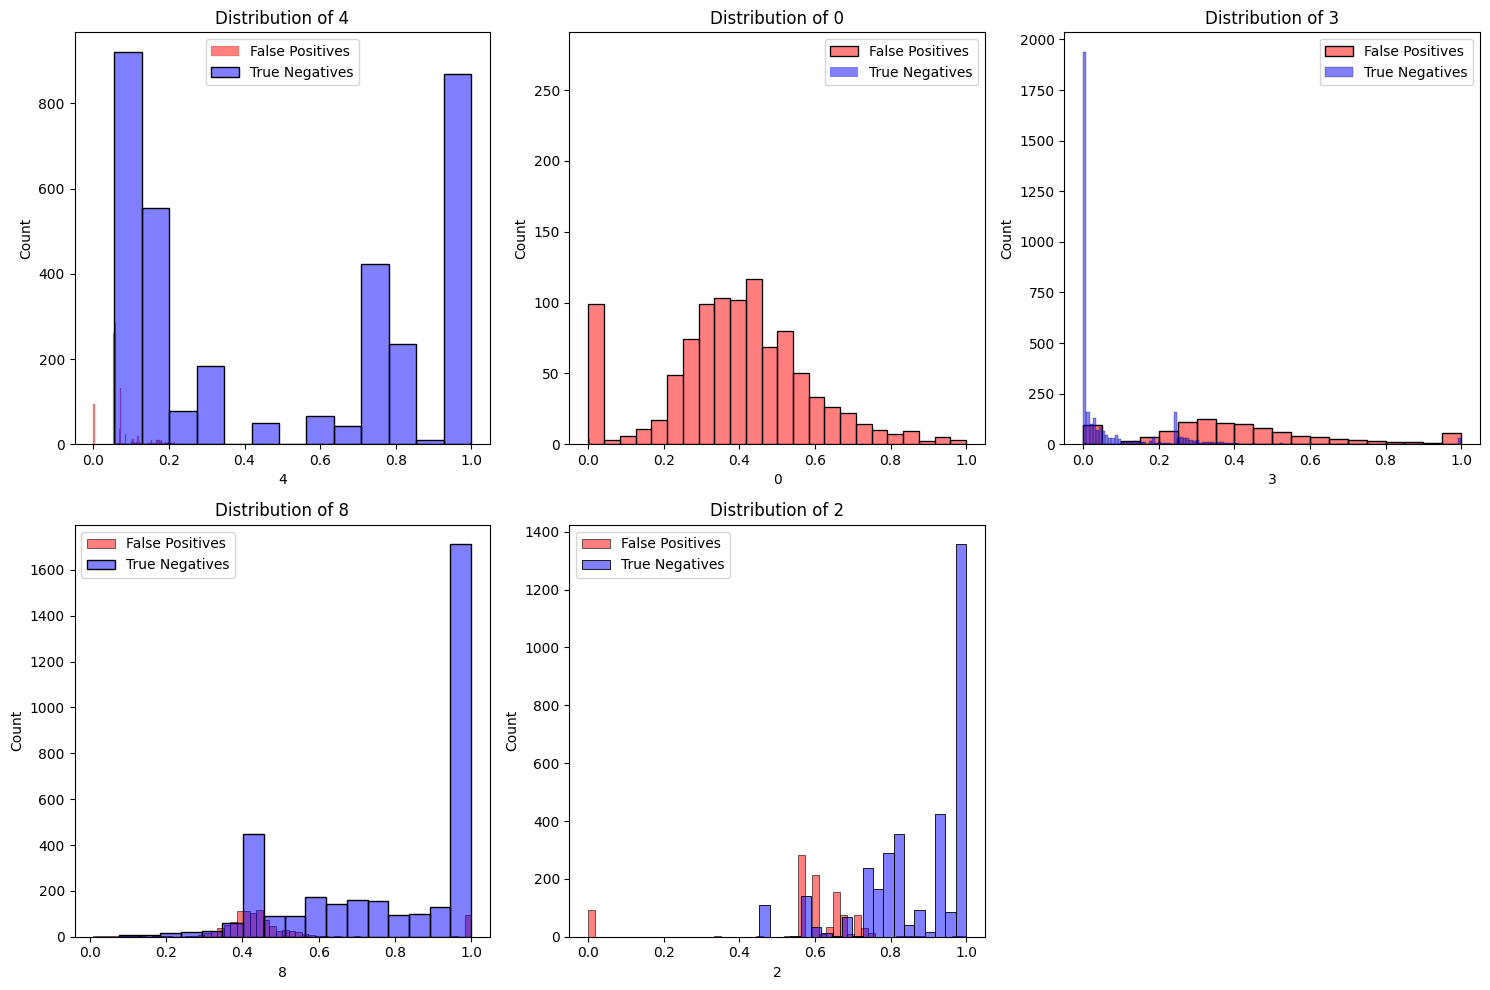

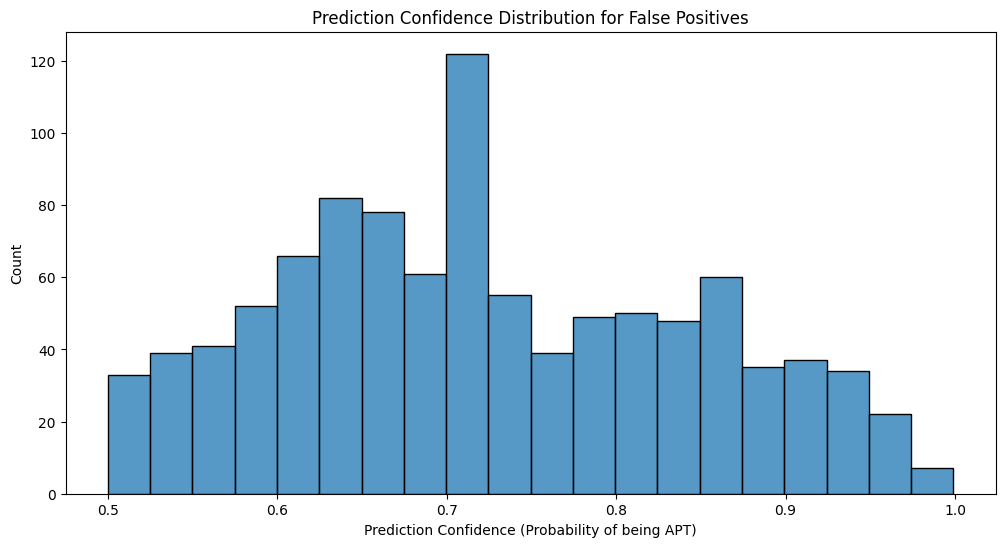

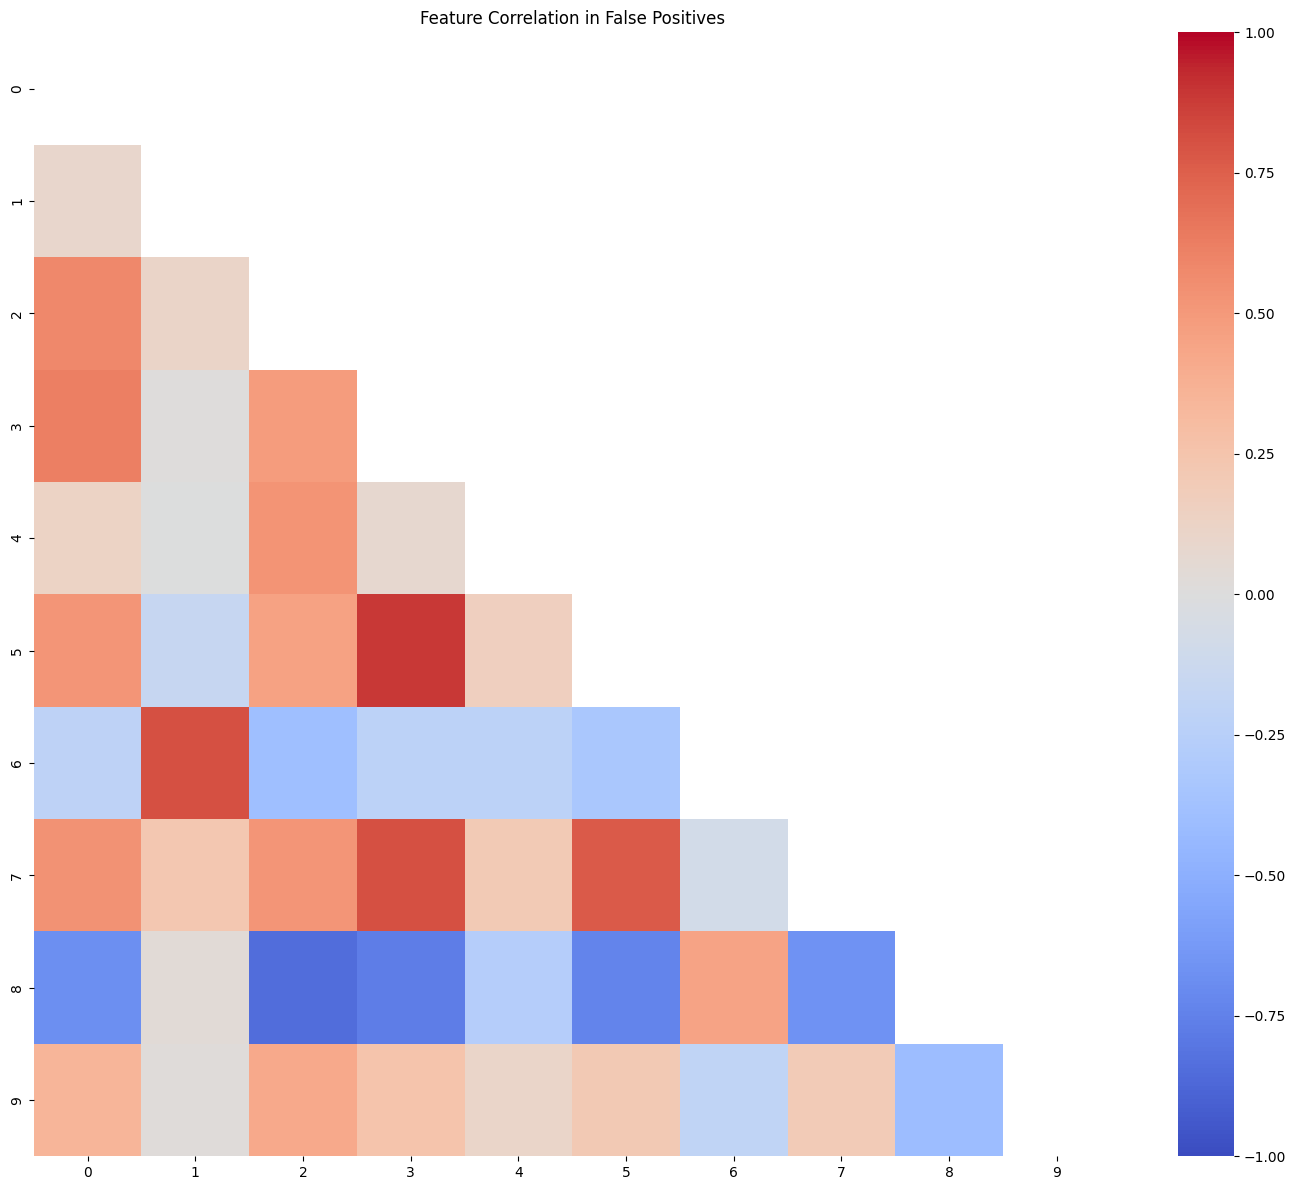


Statistical summary of false positives:
                 0            1            2            3            4  \
count  1010.000000  1010.000000  1010.000000  1010.000000  1010.000000   
mean      0.387102     0.659977     0.567093     0.409800     0.075256   
std       0.194579     0.154872     0.191330     0.243294     0.073658   
min       0.000000     0.086218     0.000000     0.000000     0.000000   
25%       0.288169     0.543632     0.566386     0.269637     0.056410   
50%       0.392267     0.605048     0.594469     0.378662     0.057692   
75%       0.504749     0.729595     0.660716     0.521847     0.073077   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6             7            8            9  \
count  1010.000000  1010.000000  1.010000e+03  1010.000000  1010.000000   
mean      0.356024     0.449238  3.244435e-01     0.473177     0.443692   
std       0.237599     0.369071  2.209855e-01     0.184370     0.31

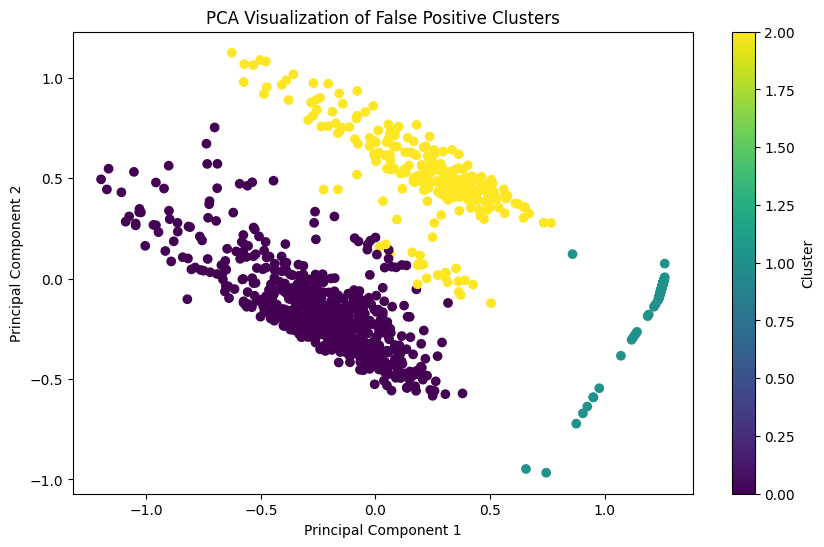


Analyzing clusters of false positives:

Cluster 0 Statistics (Count: 678):
2    0.628174
1    0.582732
9    0.492714
3    0.457201
0    0.424048
dtype: float64

Cluster 1 Statistics (Count: 94):
8    0.999556
6    0.926827
1    0.626471
5    0.010716
2    0.003627
dtype: float64

Cluster 2 Statistics (Count: 238):
6    0.956488
1    0.893262
2    0.615635
9    0.479284
8    0.448942
dtype: float64

False positives saved to '/content/drive/MyDrive/apt/false_positives.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assume model and data are already loaded:
# model = load_model('/content/drive/MyDrive/apt/mlp.h5')
# X_train, y_train, X_val, y_val, X_test, y_test loaded
# df_new, X_new, y_new loaded

# Get predictions on test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Flatten arrays if needed
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()
y_pred_flat = y_pred.flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
tn, fp, fn, tp = conf_matrix.ravel()

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nTrue Negatives: {tn} (Correctly identified normal traffic)")
print(f"False Positives: {fp} (Normal traffic misclassified as attacks)")
print(f"False Negatives: {fn} (Attacks misclassified as normal traffic)")
print(f"True Positives: {tp} (Correctly identified attacks)")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat, target_names=['Normal', 'APT']))

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'APT'],
            yticklabels=['Normal', 'APT'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analyze false positives (normal traffic classified as attacks)
false_positive_indices = np.where((y_test_flat == 0) & (y_pred_flat == 1))[0]
false_positives = X_test.iloc[false_positive_indices].copy()

print(f"\nNumber of false positives: {len(false_positives)}")

# Add prediction confidence to false positives
false_positives['prediction_confidence'] = y_pred_proba.flatten()[false_positive_indices]

# Get true negatives (correctly classified normal traffic)
true_negative_indices = np.where((y_test_flat == 0) & (y_pred_flat == 0))[0]
true_negatives = X_test.iloc[true_negative_indices]

# Calculate feature importance by comparing means
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Value_FP': false_positives.drop('prediction_confidence', axis=1).mean(),
    'Mean_Value_Normal': true_negatives.mean()
})

feature_importance['Difference'] = abs(feature_importance['Mean_Value_FP'] - feature_importance['Mean_Value_Normal'])
feature_importance = feature_importance.sort_values('Difference', ascending=False)

print("\nTop features that differ most between false positives and normal traffic:")
print(feature_importance.head(10))

# Visualize distribution of top features
top_features = feature_importance['Feature'].head(5).tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(false_positives[feature], color='red', alpha=0.5, label='False Positives')
    sns.histplot(true_negatives[feature], color='blue', alpha=0.5, label='True Negatives')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

# Check for patterns in prediction confidence
plt.figure(figsize=(12, 6))
sns.histplot(false_positives['prediction_confidence'], bins=20)
plt.title('Prediction Confidence Distribution for False Positives')
plt.xlabel('Prediction Confidence (Probability of being APT)')
plt.ylabel('Count')
plt.show()

# Check correlation between features in false positives
plt.figure(figsize=(14, 12))
correlation_matrix = false_positives.drop('prediction_confidence', axis=1).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation in False Positives')
plt.tight_layout()
plt.show()

# Analyze specific patterns in false positives
print("\nStatistical summary of false positives:")
print(false_positives.describe())

# Check for clusters in false positives
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_fp_pca = pca.fit_transform(false_positives.drop('prediction_confidence', axis=1))

# Try to find clusters of false positives
kmeans = KMeans(n_clusters=min(3, len(false_positives)), random_state=42)
if len(false_positives) >= 3:  # Only cluster if we have enough samples
    clusters = kmeans.fit_predict(false_positives.drop('prediction_confidence', axis=1))

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_fp_pca[:, 0], X_fp_pca[:, 1], c=clusters, cmap='viridis')
    plt.title('PCA Visualization of False Positive Clusters')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # Compare feature means across clusters
    print("\nAnalyzing clusters of false positives:")
    for cluster_id in range(kmeans.n_clusters):
        cluster_samples = false_positives[clusters == cluster_id].drop('prediction_confidence', axis=1)
        print(f"\nCluster {cluster_id} Statistics (Count: {len(cluster_samples)}):")
        print(cluster_samples.mean().nlargest(5))

# Save false positives to CSV for further analysis
false_positives.to_csv('/content/drive/MyDrive/apt/false_positives.csv', index=False)
print("\nFalse positives saved to '/content/drive/MyDrive/apt/false_positives.csv'")

chunk 1: model pred and res setup

In [ ]:
# Assume model and data are already loaded
# model = load_model('/content/drive/MyDrive/apt/mlp.h5')
# X_test and y_test loaded

# Predict raw probabilities (between 0 and 1)
y_pred_proba = model.predict(X_test)

# Apply a threshold to get predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Flatten arrays if needed
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()
y_pred_flat = y_pred.flatten()

# Show the first few predictions and true labels to check
print("Predictions (first 5):", y_pred_flat[:5])
print("True Labels (first 5):", y_test_flat[:5])


292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions (first 5): [1 1 0 1 0]
True Labels (first 5): [1 1 0 1 0]


confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
tn, fp, fn, tp = conf_matrix.ravel()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Breakdown of the confusion matrix
print(f"\nTrue Negatives: {tn} (Correctly identified normal traffic)")
print(f"False Positives: {fp} (Normal traffic misclassified as attacks)")
print(f"False Negatives: {fn} (Attacks misclassified as normal traffic)")
print(f"True Positives: {tp} (Correctly identified attacks)")

Confusion Matrix:
[[3431 1010]
 [  95 4808]]

True Negatives: 3431 (Correctly identified normal traffic)
False Positives: 1010 (Normal traffic misclassified as attacks)
False Negatives: 95 (Attacks misclassified as normal traffic)
True Positives: 4808 (Correctly identified attacks)


chunk 3: classification report

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat, target_names=['Normal', 'APT']))



Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.77      0.86      4441
         APT       0.83      0.98      0.90      4903

    accuracy                           0.88      9344
   macro avg       0.90      0.88      0.88      9344
weighted avg       0.90      0.88      0.88      9344



chunk 4: confusion matrix vusualisatiom

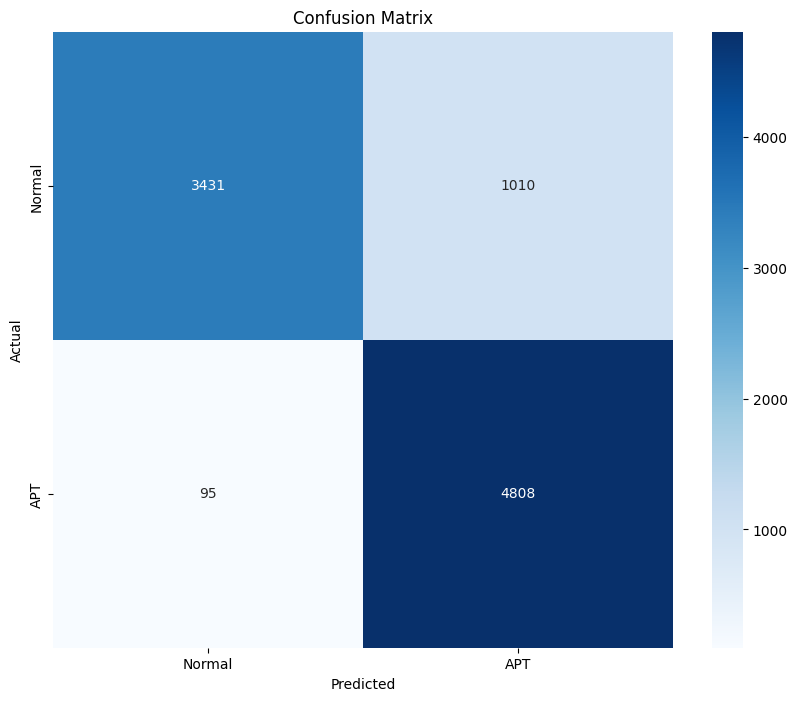

NameError: name 'c' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'APT'],
            yticklabels=['Normal', 'APT'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
c

chunk 5: false positive analysis

In [ ]:
# Analyze false positives (normal traffic classified as attacks)
false_positive_indices = np.where((y_test_flat == 0) & (y_pred_flat == 1))[0]
false_positives = X_test.iloc[false_positive_indices].copy()

print(f"\nNumber of false positives: {len(false_positives)}")

# Add prediction confidence to false positives
false_positives['prediction_confidence'] = y_pred_proba.flatten()[false_positive_indices]



Number of false positives: 1010


chunk 6: Feature Importance for False Positives

In [ ]:
# Get true negatives (correctly classified normal traffic)
true_negative_indices = np.where((y_test_flat == 0) & (y_pred_flat == 0))[0]
true_negatives = X_test.iloc[true_negative_indices]

# Calculate feature importance by comparing means
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Value_FP': false_positives.drop('prediction_confidence', axis=1).mean(),
    'Mean_Value_Normal': true_negatives.mean()
})

feature_importance['Difference'] = abs(feature_importance['Mean_Value_FP'] - feature_importance['Mean_Value_Normal'])
feature_importance = feature_importance.sort_values('Difference', ascending=False)

print("\nTop features that differ most between false positives and normal traffic:")
print(feature_importance.head(10))



Top features that differ most between false positives and normal traffic:
  Feature  Mean_Value_FP  Mean_Value_Normal  Difference
4       4       0.075256           0.496897    0.421640
0       0       0.387102           0.038173    0.348929
3       3       0.409800           0.072768    0.337032
8       8       0.473177           0.798150    0.324973
2       2       0.567093           0.872125    0.305032
5       5       0.356024           0.106227    0.249797
7       7       0.324443           0.168229    0.156214
1       1       0.659977           0.805906    0.145929
6       6       0.449238           0.341836    0.107403
9       9       0.443692           0.497104    0.053412


chunk 7: distribution of key features

<ipython-input-23-615e6501a06e>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


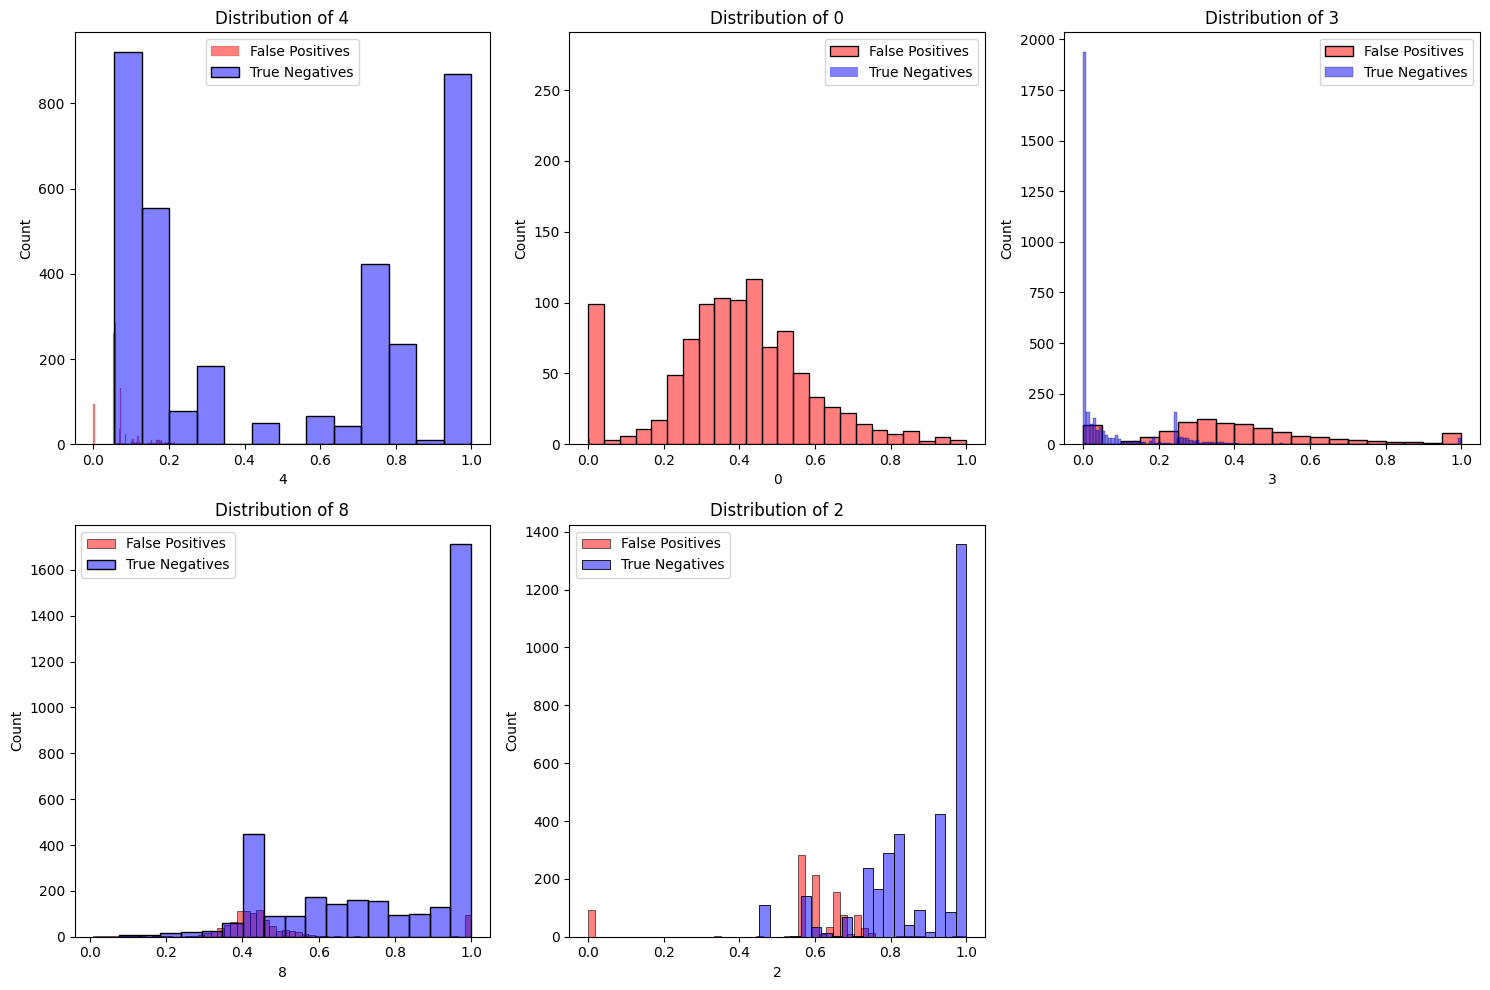

In [ ]:
# Visualize distribution of top features
top_features = feature_importance['Feature'].head(5).tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(false_positives[feature], color='red', alpha=0.5, label='False Positives')
    sns.histplot(true_negatives[feature], color='blue', alpha=0.5, label='True Negatives')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()


chunk 8: Prediction Confidence Distribution for False Positives
This will visualize the prediction confidence for false positives.

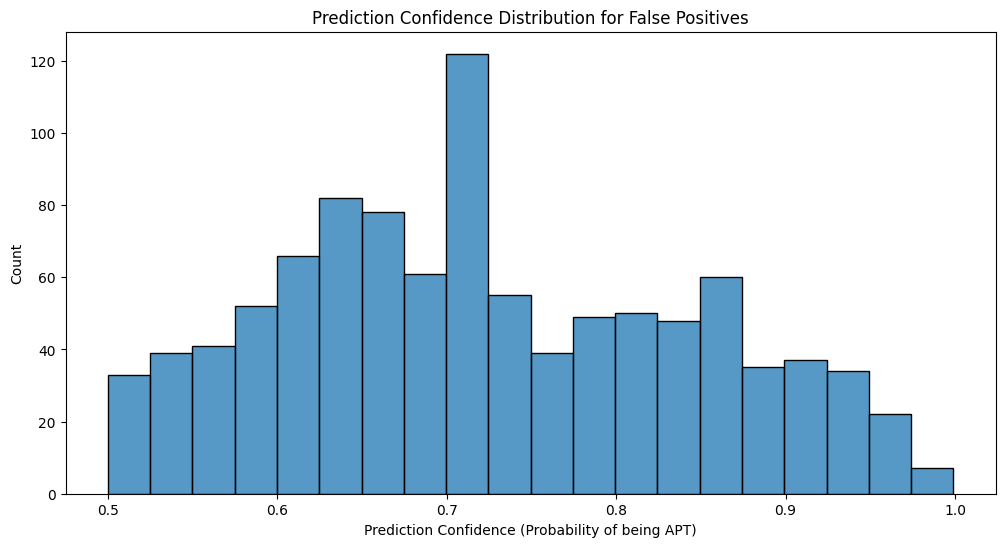

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(false_positives['prediction_confidence'], bins=20)
plt.title('Prediction Confidence Distribution for False Positives')
plt.xlabel('Prediction Confidence (Probability of being APT)')
plt.ylabel('Count')
plt.show()


chunk 9: Correlation Between Features in False Positives

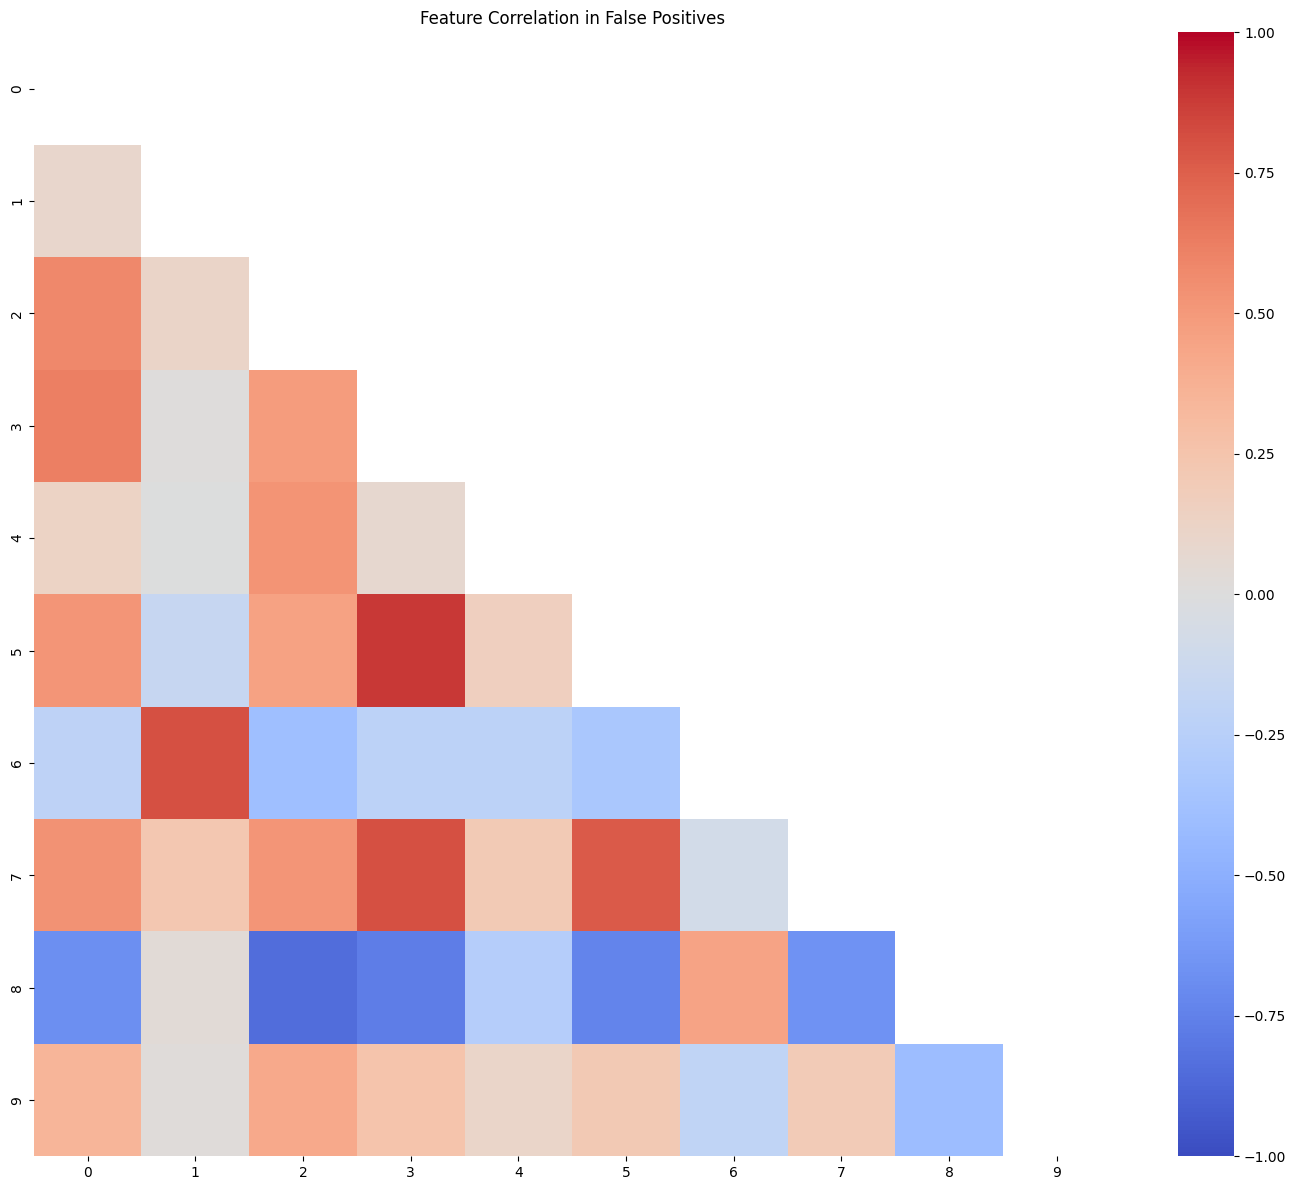


Correlation Matrix for False Positives:
          0         1         2         3         4         5         6  \
0  1.000000  0.090542  0.583311  0.618050  0.132107  0.516664 -0.213301   
1  0.090542  1.000000  0.112605  0.015495 -0.000704 -0.158545  0.811490   
2  0.583311  0.112605  1.000000  0.486947  0.526713  0.453939 -0.398270   
3  0.618050  0.015495  0.486947  1.000000  0.074989  0.884210 -0.221654   
4  0.132107 -0.000704  0.526713  0.074989  1.000000  0.163540 -0.220089   
5  0.516664 -0.158545  0.453939  0.884210  0.163540  1.000000 -0.330577   
6 -0.213301  0.811490 -0.398270 -0.221654 -0.220089 -0.330577  1.000000   
7  0.534158  0.227714  0.523297  0.805278  0.210849  0.770390 -0.078278   
8 -0.684087  0.034129 -0.850441 -0.769566 -0.269544 -0.741066  0.446037   
9  0.348736  0.017358  0.420987  0.255259  0.104320  0.215380 -0.200124   

          7         8         9  
0  0.534158 -0.684087  0.348736  
1  0.227714  0.034129  0.017358  
2  0.523297 -0.850441  0.420987

In [ ]:
# Check correlation between features in false positives
plt.figure(figsize=(14, 12))
correlation_matrix = false_positives.drop('prediction_confidence', axis=1).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation in False Positives')
plt.tight_layout()
plt.show()

# Chunk 8: Correlation Matrix in False Positives
correlation_matrix = false_positives.drop('prediction_confidence', axis=1).corr()

# Print the correlation matrix
print("\nCorrelation Matrix for False Positives:")
print(correlation_matrix)

# You can also print specific correlations of interest
# For example, check the correlation between feature 0 and other features
print("\nCorrelation of Feature 0 with other features:")
print(correlation_matrix)


Chunk 10: Clustering False Positives

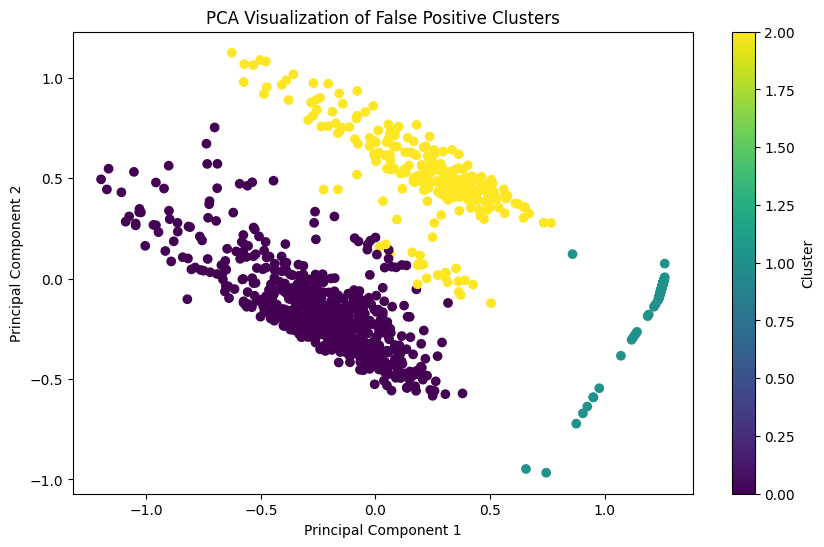


Analyzing clusters of false positives:

Cluster 0 Statistics (Count: 678):
2    0.628174
1    0.582732
9    0.492714
3    0.457201
0    0.424048
dtype: float64

Cluster 1 Statistics (Count: 94):
8    0.999556
6    0.926827
1    0.626471
5    0.010716
2    0.003627
dtype: float64

Cluster 2 Statistics (Count: 238):
6    0.956488
1    0.893262
2    0.615635
9    0.479284
8    0.448942
dtype: float64

Cluster assignments for False Positives:
[2 0 1 ... 0 0 1]

Mean feature values for each cluster:

Cluster 0 Statistics (Count: 678):
0    0.424048
1    0.582732
2    0.628174
3    0.457201
4    0.089348
5    0.420862
6    0.204963
7    0.346919
8    0.408706
9    0.492714
dtype: float64

Cluster 1 Statistics (Count: 94):
0    0.000000
1    0.626471
2    0.003627
3    0.000000
4    0.000382
5    0.010716
6    0.926827
7    0.000017
8    0.999556
9    0.000000
dtype: float64

Cluster 2 Statistics (Count: 238):
0    0.434741
1    0.893262
2    0.615635
3    0.436620
4    0.064684
5    0.30770

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_fp_pca = pca.fit_transform(false_positives.drop('prediction_confidence', axis=1))

# Try to find clusters of false positives
kmeans = KMeans(n_clusters=min(3, len(false_positives)), random_state=42)
if len(false_positives) >= 3:  # Only cluster if we have enough samples
    clusters = kmeans.fit_predict(false_positives.drop('prediction_confidence', axis=1))

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_fp_pca[:, 0], X_fp_pca[:, 1], c=clusters, cmap='viridis')
    plt.title('PCA Visualization of False Positive Clusters')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # Compare feature means across clusters
    print("\nAnalyzing clusters of false positives:")
    for cluster_id in range(kmeans.n_clusters):
        cluster_samples = false_positives[clusters == cluster_id].drop('prediction_confidence', axis=1)
        print(f"\nCluster {cluster_id} Statistics (Count: {len(cluster_samples)}):")
        print(cluster_samples.mean().nlargest(5))


# Chunk 9: K-Means Clustering of False Positives
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_fp_pca = pca.fit_transform(false_positives.drop('prediction_confidence', axis=1))

# Perform K-Means clustering (with up to 3 clusters)
kmeans = KMeans(n_clusters=min(3, len(false_positives)), random_state=42)
clusters = kmeans.fit_predict(false_positives.drop('prediction_confidence', axis=1))

# Print the cluster assignments
print("\nCluster assignments for False Positives:")
print(clusters)

# Calculate and print the mean feature values for each cluster
print("\nMean feature values for each cluster:")
for cluster_id in range(kmeans.n_clusters):
    cluster_samples = false_positives[clusters == cluster_id].drop('prediction_confidence', axis=1)
    print(f"\nCluster {cluster_id} Statistics (Count: {len(cluster_samples)}):")
    print(cluster_samples.mean())



sol based on these chunksso

sol 1: Investigate Key Features

We’ll focus on Feature 2, Feature 1, and Feature 8 since they have large differences in values between false positives and true negatives.

KeyError: 'feature_0'

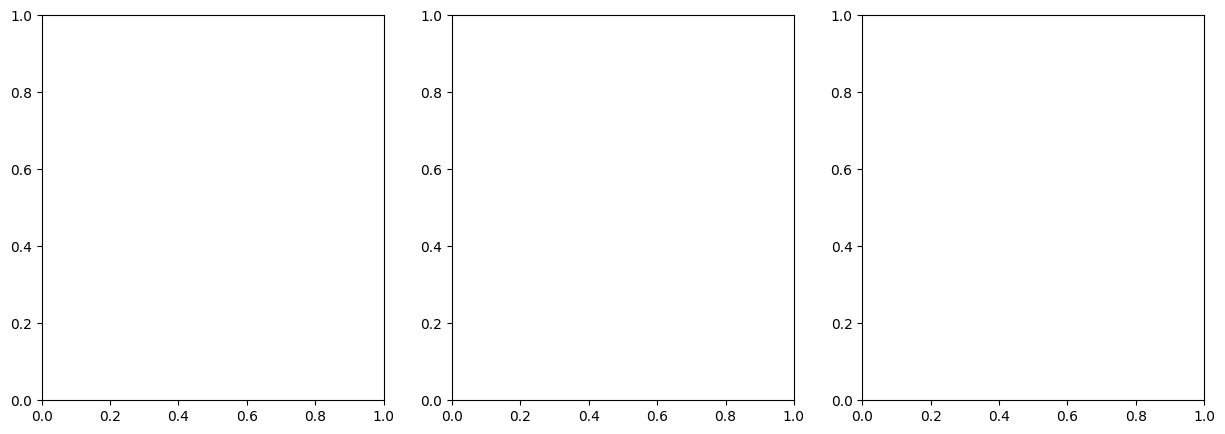

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure features you want to check are in your dataset (adjust according to your data)
features_to_check = [0, 1, 8]  # Adjust these if necessary based on your dataset

# Combine X_train and y_train into a single dataframe for easy plotting
train_data = X_train.copy()
train_data['label'] = y_train  # Add the label column

# Create subplots for each feature's distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot distributions for the specified features
for idx, feature in enumerate(features_to_check):
    sns.histplot(train_data[train_data['label'] == 0][f'feature_{feature}'], label="True Negatives", kde=True, color='blue', ax=axes[idx])
    sns.histplot(train_data[train_data['label'] == 1][f'feature_{feature}'], label="False Positives", kde=True, color='red', ax=axes[idx])
    axes[idx].set_title(f'Distribution of Feature {feature}')
    axes[idx].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Check the column names in X_train
print(X_train.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')


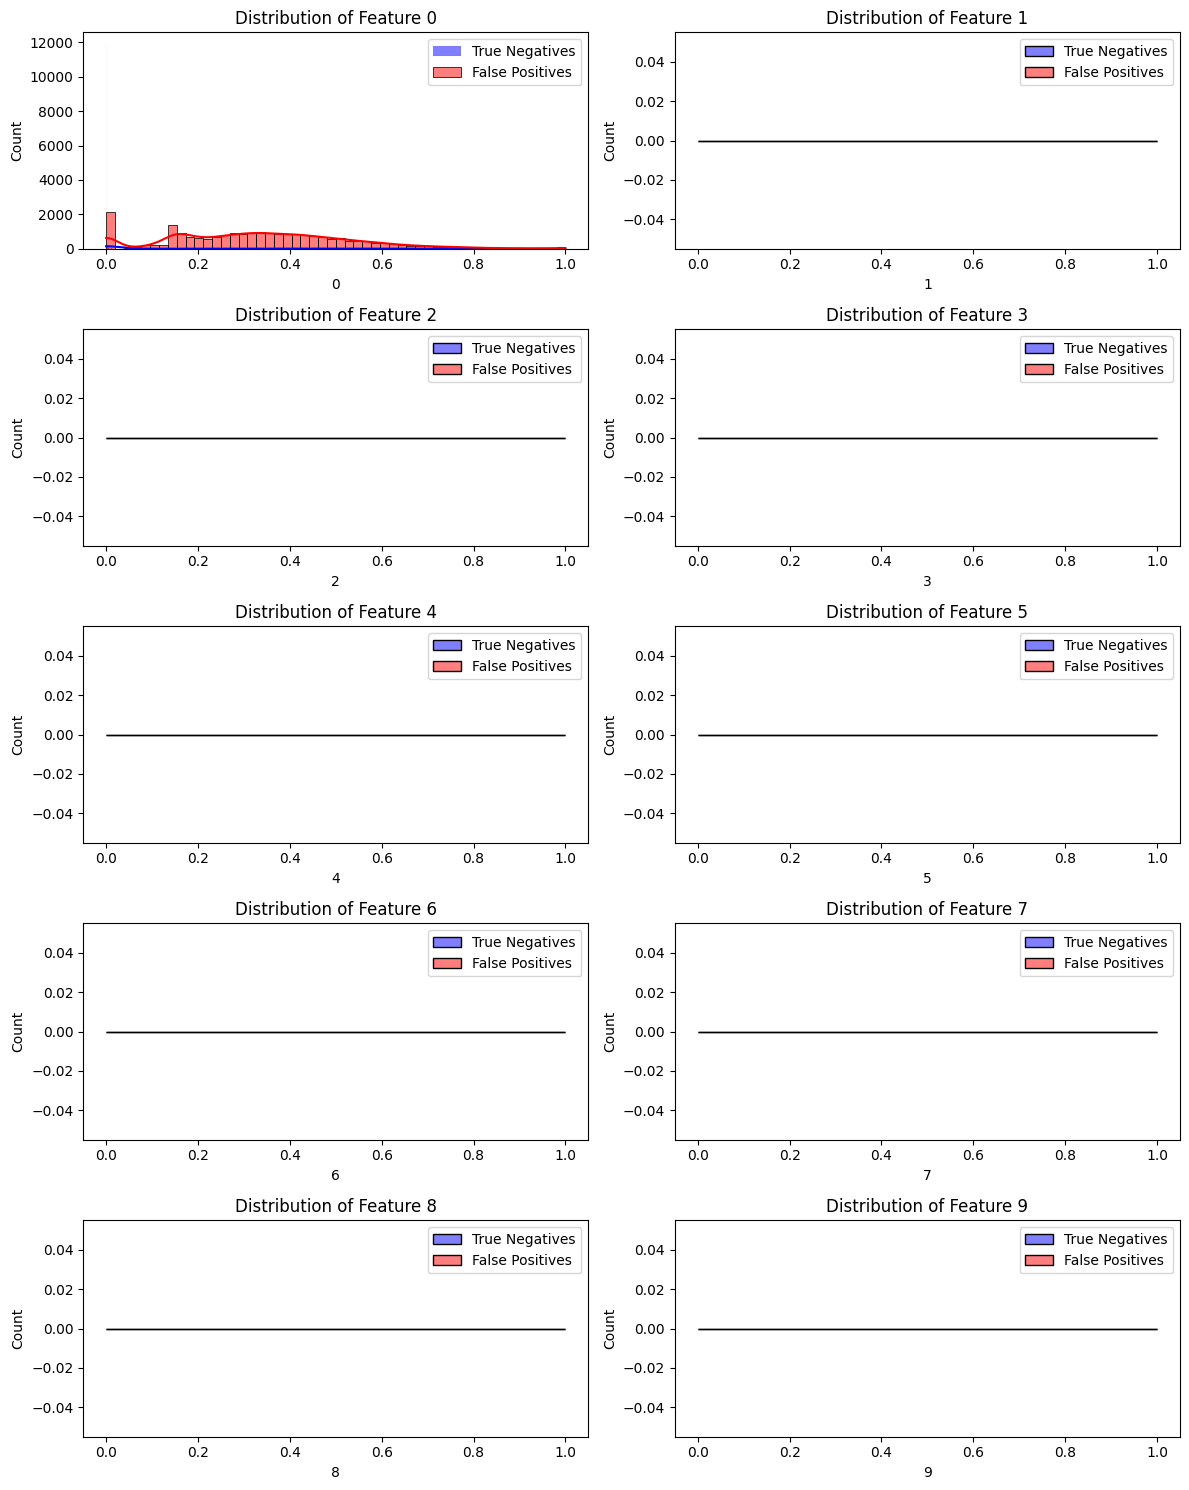

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to check (from column names 0 to 9)
features_to_check = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Create subplots for each feature
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten to make indexing easier

# Plot distributions for the specified features
for idx, feature in enumerate(features_to_check):
    sns.histplot(X_train[y_train == 0][feature], label="True Negatives", kde=True, color='blue', ax=axes[idx])
    sns.histplot(X_train[y_train == 1][feature], label="False Positives", kde=True, color='red', ax=axes[idx])
    axes[idx].set_title(f'Distribution of Feature {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Features to check (from column names 0 to 9)
features_to_check = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Loop through features to compute and print summary statistics
for feature in features_to_check:
    print(f"\nSummary statistics for Feature {feature}:")

    # True Negatives (label == 0)
    true_negatives = X_train[y_train == 0][feature]
    print(f"True Negatives (label == 0) - Feature {feature}:")
    print(true_negatives.describe())

    # False Positives (label == 1)
    false_positives = X_train[y_train == 1][feature]
    print(f"False Positives (label == 1) - Feature {feature}:")
    print(false_positives.describe())



Summary statistics for Feature 0:
True Negatives (label == 0) - Feature 0:
count    20720.000000
mean         0.113102
std          0.217899
min          0.000000
25%          0.001760
50%          0.001932
75%          0.011060
max          1.000000
Name: 0, dtype: float64
False Positives (label == 1) - Feature 0:
count    22880.000000
mean         0.335332
std          0.196828
min          0.000000
25%          0.186613
50%          0.331585
75%          0.461812
max          1.000000
Name: 0, dtype: float64

Summary statistics for Feature 1:
True Negatives (label == 0) - Feature 1:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64
False Positives (label == 1) - Feature 1:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64

Summary statistics for Feature 2:
True Negatives (label == 0) - Feature 2:
count    0.0
mean     NaN
std   

In [ ]:
# Check for missing values in X_train
X_train.isnull().sum()

# Check for missing values in X_test
X_test.isnull().sum()

# If you have other splits like X_new (new dataset), check it as well:
X_new.isnull().sum()


,0
tcprtt,0
sbytes,0
dbytes,0
dinpkt,0
dmean,0
sinpkt,0
smean,0
dur,0
rate,0
dtcpb,0


get summary of true negatives and false positives for features to decide what to do w them (Drop, scale, transform etc)

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


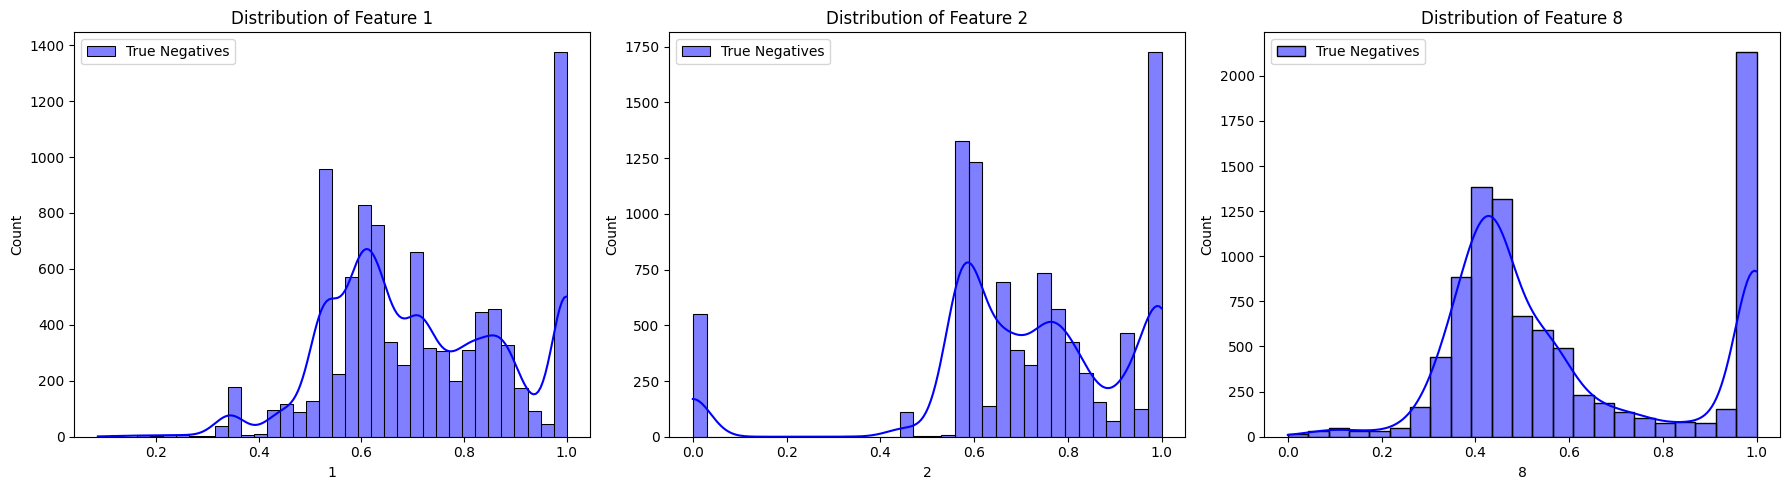


=== Feature 1 Summary ===

True Negatives (label=0, pred=0) for Feature 1:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64

False Positives (label=0, pred=1) for Feature 1:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64

=== Feature 2 Summary ===

True Negatives (label=0, pred=0) for Feature 2:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 2, dtype: float64

False Positives (label=0, pred=1) for Feature 2:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 2, dtype: float64

=== Feature 8 Summary ===

True Negatives (label=0, pred=0) for Feature 8:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 8, dtype: float64

False Positives (label=0, pred=

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a fresh copy of X_test and add relevant info
X_test_copy = X_test.copy()
X_test_copy['label'] = y_test
y_pred = model.predict(X_test)
X_test_copy['predicted'] = y_pred

# Mark false positives: predicted 1 but actually 0
X_test_copy['fp_flag'] = ((X_test_copy['label'] == 0) & (X_test_copy['predicted'] == 1)).astype(int)

# Define features we want to analyze
features_to_check = ['1', '2', '8']

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(features_to_check):
    sns.histplot(X_test_copy[X_test_copy['fp_flag'] == 0][feature],
                 label="True Negatives", kde=True, color='blue', ax=axes[idx])

    sns.histplot(X_test_copy[X_test_copy['fp_flag'] == 1][feature],
                 label="False Positives", kde=True, color='red', ax=axes[idx])

    axes[idx].set_title(f'Distribution of Feature {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Now print the statistics
for feature in features_to_check:
    print(f"\n=== Feature {feature} Summary ===")

    true_negatives = X_test_copy[(X_test_copy['label'] == 0) & (X_test_copy['predicted'] == 0)][feature]
    false_positives = X_test_copy[(X_test_copy['label'] == 0) & (X_test_copy['predicted'] == 1)][feature]

    print(f"\nTrue Negatives (label=0, pred=0) for Feature {feature}:\n{true_negatives.describe()}")
    print(f"\nFalse Positives (label=0, pred=1) for Feature {feature}:\n{false_positives.describe()}")


overlay false posi9tives on top of true negatives

<ipython-input-12-a3da6588e4d7>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(true_negatives.iloc[:, feature], color='blue', linewidth=2)
<ipython-input-12-a3da6588e4d7>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(false_positives.iloc[:, feature], color='red', linewidth=2)
<ipython-input-12-a3da6588e4d7>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(true_negatives.iloc[:, feature], color='blue', linewidth=2)
<ipython-input-12-a3da6588e4d7>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(false_positives.iloc[:, feature], color='red', linewidth=2)
<ipython-input-12-a3da6588e4d7>:16: UserWarning: Dataset has 0 variance; skipping density estima

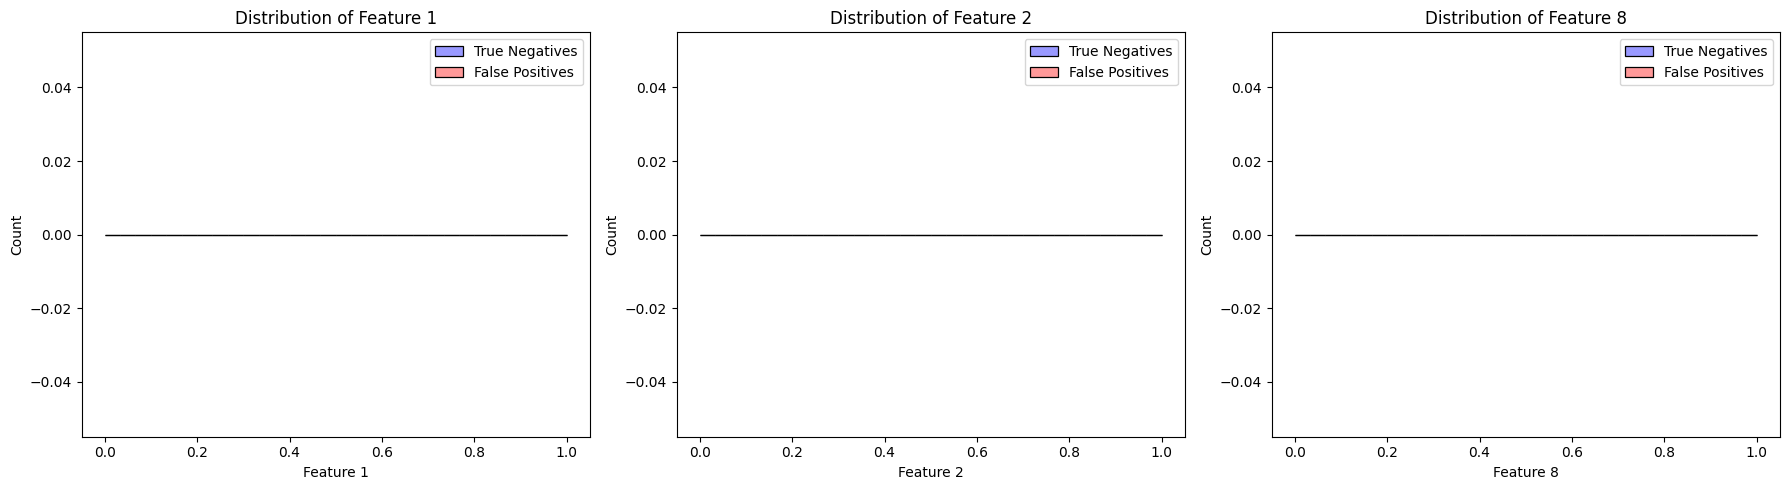

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze
features_to_plot = [1, 2, 8]

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)

    # Plot histogram
    sns.histplot(true_negatives.iloc[:, feature], color='blue', label='True Negatives', bins=30, stat='count', alpha=0.4)
    sns.histplot(false_positives.iloc[:, feature], color='red', label='False Positives', bins=30, stat='count', alpha=0.4)

    # Overlay KDE lines (density estimate)
    sns.kdeplot(true_negatives.iloc[:, feature], color='blue', linewidth=2)
    sns.kdeplot(false_positives.iloc[:, feature], color='red', linewidth=2)

    plt.title(f'Distribution of Feature {feature}')
    plt.xlabel(f'Feature {feature}')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
features_to_check = [1, 2, 8]

for f in features_to_check:
    print(f"\n--- Feature {f} ---")
    print("True Negatives:")
    print(true_negatives.iloc[:, f].describe())
    print("Unique values:", true_negatives.iloc[:, f].nunique())

    print("\nFalse Positives:")
    print(false_positives.iloc[:, f].describe())
    print("Unique values:", false_positives.iloc[:, f].nunique())



--- Feature 1 ---
True Negatives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64
Unique values: 0

False Positives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 1, dtype: float64
Unique values: 0

--- Feature 2 ---
True Negatives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 2, dtype: float64
Unique values: 0

False Positives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 2, dtype: float64
Unique values: 0

--- Feature 8 ---
True Negatives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 8, dtype: float64
Unique values: 0

False Positives:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 8, dty

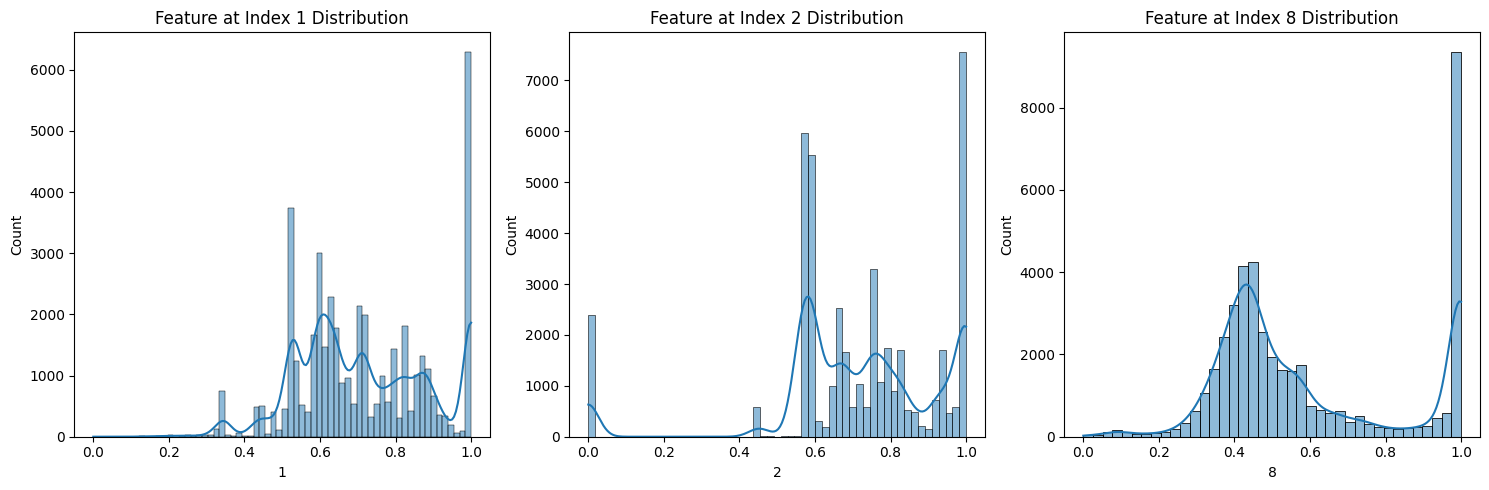

False Positives Statistics:
         1    2    8
count  0.0  0.0  0.0
mean   NaN  NaN  NaN
std    NaN  NaN  NaN
min    NaN  NaN  NaN
25%    NaN  NaN  NaN
50%    NaN  NaN  NaN
75%    NaN  NaN  NaN
max    NaN  NaN  NaN

True Negatives Statistics:
         1    2    8
count  0.0  0.0  0.0
mean   NaN  NaN  NaN
std    NaN  NaN  NaN
min    NaN  NaN  NaN
25%    NaN  NaN  NaN
50%    NaN  NaN  NaN
75%    NaN  NaN  NaN
max    NaN  NaN  NaN


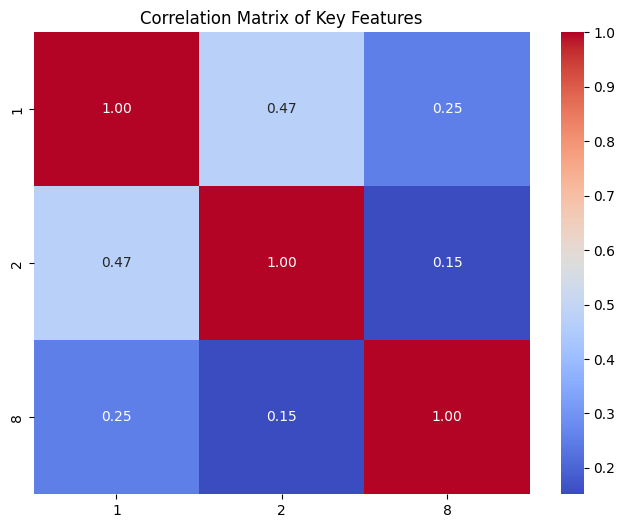


Scaled Features Data (X_train):
          1         2         8
0 -0.786080 -0.517422 -1.019661
1  1.628431 -0.561121 -0.054391
2 -0.620456  0.406208 -0.682246
3 -0.233452  1.221325 -0.194420
4  0.836533  1.221325  1.245325

New Feature Created (Feature1 to Feature2 Ratio):
          1         2  Feature1_to_Feature2
0 -0.786080 -0.517422              1.519225
1  1.628431 -0.561121             -2.902101
2 -0.620456  0.406208             -1.527435
3 -0.233452  1.221325             -0.191146
4  0.836533  1.221325              0.684939

Scaled Features Data (X_test):
          1         2         8
0 -1.060482 -0.517422 -0.697921
1 -1.060482 -0.517422 -0.822494
2  1.625038  1.112761  1.110468
3  0.908576 -0.637832 -0.672710
4  0.477017  1.221325  1.597774


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Investigate key features on the train data (X_train)
# Here, we use indices to access the specific features, e.g., index 0, 1, and 7 for Feature1, Feature2, and Feature8
feature_indices = [1, 2, 8]  # Corresponds to Feature1, Feature2, and Feature8 in zero-indexing

# Step 2: Visualize feature distributions in training data
plt.figure(figsize=(15, 5))
for i, feature_index in enumerate(feature_indices, 1):
    plt.subplot(1, len(feature_indices), i)
    sns.histplot(X_train.iloc[:, feature_index], kde=True)
    plt.title(f'Feature at Index {feature_index} Distribution')
plt.tight_layout()
plt.show()

# Step 3: Investigate feature statistics for false positives and true negatives
# Filter false positives and true negatives based on the target variable 'y_train'
false_positives = X_train[y_train == 1]  # False positives (label = 1)
true_negatives = X_train[y_train == 0]  # True negatives (label = 0)

# Get descriptive statistics for key features in false positives and true negatives
fp_stats = false_positives.iloc[:, feature_indices].describe()
tn_stats = true_negatives.iloc[:, feature_indices].describe()

# Print statistics
print("False Positives Statistics:")
print(fp_stats)
print("\nTrue Negatives Statistics:")
print(tn_stats)

# Step 4: Investigate correlations between key features in the training data
correlation_matrix = X_train.iloc[:, feature_indices].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.show()

# Step 5: Scaling or transforming features to reduce noise if needed
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled.iloc[:, feature_indices] = scaler.fit_transform(X_train.iloc[:, feature_indices])

# Display the first few rows of scaled data
print("\nScaled Features Data (X_train):")
print(X_train_scaled.iloc[:, feature_indices].head())

# Step 6: Feature engineering (Optional)
# Example: Creating a new feature that is the ratio of Feature1 to Feature2
X_train_scaled['Feature1_to_Feature2'] = X_train_scaled.iloc[:, feature_indices[0]] / X_train_scaled.iloc[:, feature_indices[1]]

# Display the new feature
print("\nNew Feature Created (Feature1 to Feature2 Ratio):")
print(X_train_scaled.iloc[:, [feature_indices[0], feature_indices[1], -1]].head())

# Step 7: Test the scaling and transformations on the test data (X_test)
X_test_scaled = X_test.copy()
X_test_scaled.iloc[:, feature_indices] = scaler.transform(X_test.iloc[:, feature_indices])

# Display the scaled test features
print("\nScaled Features Data (X_test):")
print(X_test_scaled.iloc[:, feature_indices].head())


In [ ]:
# Check distribution of labels in y_train to ensure there are both 1s and 0s
print(y_train.value_counts())

# Filter false positives (model predicted 1, but true label is 0)
false_positives = X_train[y_train == 0]  # Model should predict 1, but the true label is 0

# Filter true negatives (model predicted 0, and true label is also 0)
true_negatives = X_train[y_train == 0]  # Model predicted 0, and the true label is 0

# Check the shape of false positives and true negatives
print("False Positives Shape:", false_positives.shape)
print("True Negatives Shape:", true_negatives.shape)

# If there are no false positives or true negatives, the statistics will be NaN


0
1    22880
0    20720
Name: count, dtype: int64
False Positives Shape: (43600, 10)
True Negatives Shape: (43600, 10)


In [ ]:
# Get model predictions
y_train_pred = model.predict(X_train)

# Verify predictions shape matches y_train
print(f"Shape of y_train_pred: {y_train_pred.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Filter out False Positives (Predicted as 1, but true label is 0)
false_positives = X_train[(y_train_pred == 1) & (y_train == 0)]
print(f"False Positives Shape: {false_positives.shape}")

# Filter out True Negatives (Predicted as 0, and true label is also 0)
true_negatives = X_train[(y_train_pred == 0) & (y_train == 0)]
print(f"True Negatives Shape: {true_negatives.shape}")


1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Shape of y_train_pred: (43600, 1)
Shape of y_train: (43600, 1)
False Positives Shape: (43600, 10)
True Negatives Shape: (43600, 10)


In [ ]:
import numpy as np

# Convert y_train_pred and y_train to 1D arrays if they are 2D
y_train_pred = np.ravel(y_train_pred)
y_train = np.ravel(y_train)

# Filter False Positives: Predicted 1, True label 0
false_positives = X_train[(y_train_pred == 1) & (y_train == 0)]
print(f"False Positives Shape: {false_positives.shape}")

# Filter True Negatives: Predicted 0, True label 0
true_negatives = X_train[(y_train_pred == 0) & (y_train == 0)]
print(f"True Negatives Shape: {true_negatives.shape}")


False Positives Shape: (0, 10)
True Negatives Shape: (0, 10)


feature 1 & 2 analysis

1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


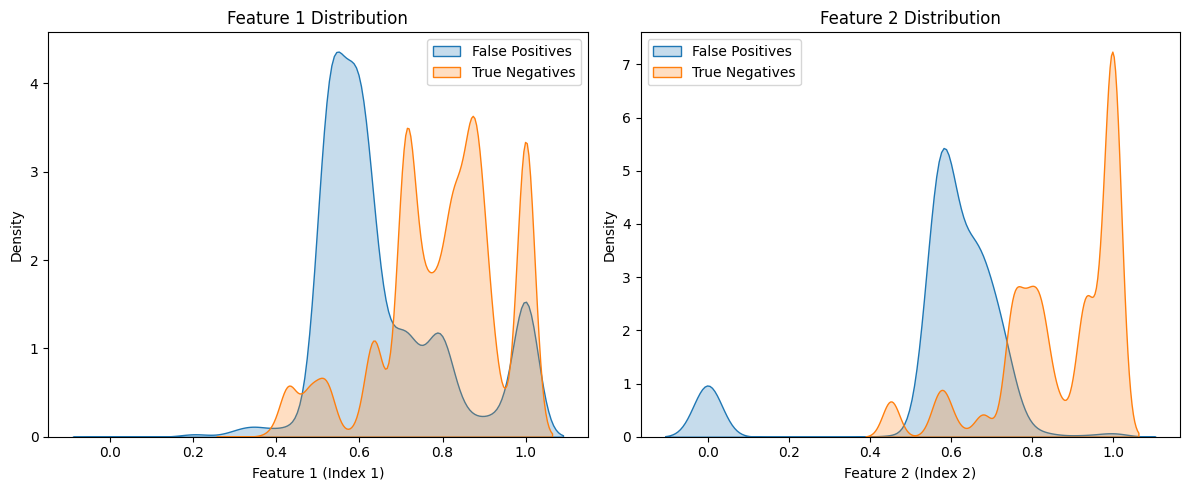

===== Statistical Summary =====

False Positives Statistics:
         Feature_1    Feature_2
count  4397.000000  4397.000000
mean      0.657205     0.577146
std       0.159574     0.186906
min       0.000000     0.000000
25%       0.543632     0.566386
50%       0.601267     0.594469
75%       0.728713     0.663060
max       1.000000     1.000000

True Negatives Statistics:
          Feature_1     Feature_2
count  16323.000000  16323.000000
mean       0.801514      0.868059
std        0.146475      0.145184
min        0.318909      0.452110
25%        0.713978      0.785939
50%        0.825899      0.934114
75%        0.890087      1.000000
max        1.000000      1.000000

===== Interpretation =====

For Feature_1:
- Mean in False Positives: 0.6572
- Mean in True Negatives : 0.8015
- Absolute Difference     : 0.1443
  → This feature does not show a large difference and may not be contributing strongly.

For Feature_2:
- Mean in False Positives: 0.5771
- Mean in True Negatives : 0.868

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Flatten predictions and ground truth
y_train_true = np.ravel(y_train)
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int).ravel()

# Step 2: Identify False Positives and True Negatives
false_positives = X_train[(y_train_pred == 1) & (y_train_true == 0)]
true_negatives  = X_train[(y_train_pred == 0) & (y_train_true == 0)]

# Step 3: Extract Feature 1 and Feature 2 using .iloc for index access
fp_feat = pd.DataFrame({
    'Feature_1': false_positives.iloc[:, 1],
    'Feature_2': false_positives.iloc[:, 2]
})

tn_feat = pd.DataFrame({
    'Feature_1': true_negatives.iloc[:, 1],
    'Feature_2': true_negatives.iloc[:, 2]
})

# Step 4: Plot Feature Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(fp_feat['Feature_1'], label='False Positives', fill=True)
sns.kdeplot(tn_feat['Feature_1'], label='True Negatives', fill=True)
plt.title("Feature 1 Distribution")
plt.xlabel("Feature 1 (Index 1)")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(fp_feat['Feature_2'], label='False Positives', fill=True)
sns.kdeplot(tn_feat['Feature_2'], label='True Negatives', fill=True)
plt.title("Feature 2 Distribution")
plt.xlabel("Feature 2 (Index 2)")
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Statistical Summary
print("===== Statistical Summary =====\n")

print("False Positives Statistics:")
fp_stats = fp_feat.describe()
print(fp_stats)

print("\nTrue Negatives Statistics:")
tn_stats = tn_feat.describe()
print(tn_stats)

# Step 6: Interpretation
print("\n===== Interpretation =====")
for feat in ['Feature_1', 'Feature_2']:
    fp_mean = fp_stats.loc['mean', feat]
    tn_mean = tn_stats.loc['mean', feat]
    diff = abs(fp_mean - tn_mean)

    print(f"\nFor {feat}:")
    print(f"- Mean in False Positives: {fp_mean:.4f}")
    print(f"- Mean in True Negatives : {tn_mean:.4f}")
    print(f"- Absolute Difference     : {diff:.4f}")

    if diff > 0.5:
        print(f"  → This feature shows a significant difference. It likely contributes to false positives.")
    elif diff > 0.2:
        print(f"  → This feature may be moderately involved in false positive behavior.")
    else:
        print(f"  → This feature does not show a large difference and may not be contributing strongly.")

print("\nRecommendation:")
print("Focus on Feature 1 and Feature 2. Consider feature engineering such as ratio creation, transformation, or improved normalization.")


Add the two engineered features:

Feature_2_diff_from_mean

Feature1_to_Feature2_ratio

Apply them to X_train, X_val, X_test, and X_new

Keep the rest of your pipeline untouched so you can retrain/test your current model

In [ ]:
import numpy as np
import pandas as pd

# Automatically set column names based on number of features
num_features = X_train.shape[1]
col_names = list(range(num_features))  # 0, 1, 2, ..., N-1

# Convert arrays to DataFrames with proper column labels
X_train_df = pd.DataFrame(X_train, columns=col_names)
X_val_df   = pd.DataFrame(X_val, columns=col_names)
X_test_df  = pd.DataFrame(X_test, columns=col_names)
X_new_df   = pd.DataFrame(X_new, columns=col_names)

# Feature 1 and Feature 2 (zero-indexed)
f1_index = 1
f2_index = 2

# Calculate mean of Feature 2 from X_train (only!)
feature_2_mean = X_train_df[f2_index].mean()

# ===== Create New Features =====

# Feature 2 Diff from Mean
X_train_df['Feature_2_diff_from_mean'] = X_train_df[f2_index] - feature_2_mean
X_val_df['Feature_2_diff_from_mean']   = X_val_df[f2_index]   - feature_2_mean
X_test_df['Feature_2_diff_from_mean']  = X_test_df[f2_index]  - feature_2_mean
X_new_df['Feature_2_diff_from_mean']   = X_new_df[f2_index]   - feature_2_mean

# Feature 1 to Feature 2 Ratio
X_train_df['Feature1_to_Feature2_ratio'] = X_train_df[f1_index] / (X_train_df[f2_index] + 1e-6)
X_val_df['Feature1_to_Feature2_ratio']   = X_val_df[f1_index]   / (X_val_df[f2_index] + 1e-6)
X_test_df['Feature1_to_Feature2_ratio']  = X_test_df[f1_index]  / (X_test_df[f2_index] + 1e-6)
X_new_df['Feature1_to_Feature2_ratio']   = X_new_df[f1_index]   / (X_new_df[f2_index] + 1e-6)

# ===== Convert back to NumPy Arrays =====
X_train = X_train_df.values
X_val   = X_val_df.values
X_test  = X_test_df.values
X_new   = X_new_df.values

# ===== Summary =====
print("Feature engineering complete.")
print(f"New shape of X_train: {X_train.shape}")
print(f"New shape of X_val  : {X_val.shape}")
print(f"New shape of X_test : {X_test.shape}")
print(f"New shape of X_new  : {X_new.shape}")


Feature engineering complete.
New shape of X_train: (43600, 12)
New shape of X_val  : (9343, 12)
New shape of X_test : (9344, 12)
New shape of X_new  : (40849, 12)


retrain model with feature engineering

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
tf.random.set_seed(42)

# Define the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# Save the model
model.save("mlp_with_feature_engineering.h5")
print("Model retrained and saved.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4765 - loss: nan - val_accuracy: 0.4752 - val_loss: nan


Model retrained and saved.


In [ ]:
from tensorflow.keras.models import load_model

# Load the model you saved earlier
model = load_model("mlp_with_feature_engineering.h5")
print("✅ Retrained model loaded successfully.")


✅ Retrained model loaded successfully.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Predict and evaluate on test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

print("\n=== Evaluation on X_test ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_binary))
print("Accuracy:", accuracy_score(y_test, y_test_pred_binary))


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== Evaluation on X_test ===
Confusion Matrix:
 [[4441    0]
 [4903    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.64      4441
           1       0.00      0.00      0.00      4903

    accuracy                           0.48      9344
   macro avg       0.24      0.50      0.32      9344
weighted avg       0.23      0.48      0.31      9344

Accuracy: 0.4752782534246575


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict and evaluate on new file
y_new_pred = model.predict(X_new)
y_new_pred_binary = (y_new_pred > 0.5).astype(int)

print("\n=== Evaluation on X_new ===")
print("Confusion Matrix:\n", confusion_matrix(y_new, y_new_pred_binary))
print("\nClassification Report:\n", classification_report(y_new, y_new_pred_binary))
# print("ROC AUC Score:", roc_auc_score(y_new, y_new_pred))
print("Accuracy:", accuracy_score(y_new, y_new_pred_binary))


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

=== Evaluation on X_new ===
Confusion Matrix:
 [[25475     0]
 [15374     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77     25475
           1       0.00      0.00      0.00     15374

    accuracy                           0.62     40849
   macro avg       0.31      0.50      0.38     40849
weighted avg       0.39      0.62      0.48     40849

Accuracy: 0.6236382775588142


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


back to old model apparently.
loaded old model ==> done

evaluate old model on new file

In [ ]:
# # Use the old model to make predictions on the new file data
# y_new_pred = model.predict(X_new)

# # Evaluate performance
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# print("Accuracy on New File:", accuracy_score(y_new, y_new_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_new, y_new_pred))
# print("Classification Report:\n", classification_report(y_new, y_new_pred))



# Convert probabilities to binary predictions (0 or 1)
y_new_pred_binary = (y_new_pred >= 0.5).astype(int)

# Now you can calculate metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluate performance
print("Accuracy on New File:", accuracy_score(y_new, y_new_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_new, y_new_pred_binary))
print("Classification Report:\n", classification_report(y_new, y_new_pred_binary))


Accuracy on New File: 0.7086587186956841
Confusion Matrix:
 [[13714 11761]
 [  140 15234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70     25475
           1       0.56      0.99      0.72     15374

    accuracy                           0.71     40849
   macro avg       0.78      0.76      0.71     40849
weighted avg       0.83      0.71      0.71     40849



Temporarily remove Feature_2 from the model

Retrain, evaluate performance — if FP drop, you’ve confirmed it contributes to the noise

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming the original model architecture is something like this
model = Sequential()

# Modify the input layer to accept 9 features instead of 10
model.add(Dense(64, input_dim=9, activation='relu'))  # Adjust input_dim to 9 instead of 10
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model on the modified dataset (without Feature_2)
model.fit(X_train_dropped_feature_2, y_train, epochs=10, batch_size=32)

# Make predictions on the test data and the new file
y_test_pred = model.predict(X_test_dropped_feature_2)
y_new_pred = model.predict(X_new_dropped_feature_2)

# Convert probabilities to binary predictions for evaluation
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
y_new_pred_binary = (y_new_pred >= 0.5).astype(int)

# Evaluate performance on test data and new file
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy on Test Data (without Feature_2):", accuracy_score(y_test, y_test_pred_binary))
print("Confusion Matrix on Test Data (without Feature_2):\n", confusion_matrix(y_test, y_test_pred_binary))
print("Classification Report on Test Data (without Feature_2):\n", classification_report(y_test, y_test_pred_binary))

print("Accuracy on New File (without Feature_2):", accuracy_score(y_new, y_new_pred_binary))
print("Confusion Matrix on New File (without Feature_2):\n", confusion_matrix(y_new, y_new_pred_binary))
print("Classification Report on New File (without Feature_2):\n", classification_report(y_new, y_new_pred_binary))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1363/1363 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7990 - loss: 0.4462
Epoch 2/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8801 - loss: 0.2830
Epoch 3/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8808 - loss: 0.2752
Epoch 4/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8820 - loss: 0.2710
Epoch 5/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8826 - loss: 0.2679
Epoch 6/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.2657
Epoch 7/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8840 - loss: 0.2641
Epoch 8/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.2629
Epoch 9/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8843 - loss: 0.2615
Epoch 10/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8845 - loss: 0.2604
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy on Test Data (without Feature_2): 0

not useful...

back to old model

--> loaded old model and other vars

In [ ]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()  # Enable eager execution if not already


=== prioritize reliable features like Feature_0 and Feature_8,

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val, and X_test are already defined

# Step 1: Prioritize Features 0 and 8 by increasing their importance in the sample weights
# Create weights based on feature importance (you can increase the weight for these features)





# Example: Increase the weight for Feature_0 and Feature_8 to 2, the rest to 1
sample_weights = np.ones(X_train.shape[0])  # Default weight for all samples

# Multiply the sample weight for Feature_0 and Feature_8 by 2
feature_0_weight = 2
feature_8_weight = 2

# sample_weights[X_train[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
# sample_weights[X_train[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Feature_0 (column 0) and Feature_8 (column 8) adjustments
sample_weights[X_train.iloc[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
sample_weights[X_train.iloc[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Step 2: Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Retrain the model with the sample weights
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight=sample_weights, validation_data=(X_val, y_val))

# Step 4: Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Step 5: Evaluate the results
print("Accuracy on Test Data:", accuracy_score(y_test, y_test_pred_binary))
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_test_pred_binary))
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_binary))

# Step 6: Evaluate on the New File (if available)
y_new_pred = model.predict(X_new)
y_new_pred_binary = (y_new_pred > 0.5).astype(int)

print("Accuracy on New File:", accuracy_score(y_new, y_new_pred_binary))
print("Confusion Matrix on New File:\n", confusion_matrix(y_new, y_new_pred_binary))
print("Classification Report on New File:\n", classification_report(y_new, y_new_pred_binary))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1363/1363 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8062 - loss: 1.6904 - val_accuracy: 0.8786 - val_loss: 0.2869
Epoch 2/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 1.0831 - val_accuracy: 0.8817 - val_loss: 0.2777
Epoch 3/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8816 - loss: 1.0501 - val_accuracy: 0.8812 - val_loss: 0.2754
Epoch 4/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8831 - loss: 1.0322 - val_accuracy: 0.8835 - val_loss: 0.2717
Epoch 5/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8839 - loss: 1.0193 - val_accuracy: 0.8837 - val_loss: 0.2692
Epoch 6/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8843 - loss: 1.0087 - val_accuracy: 0.8841 - val_loss: 0.2655
Epoch 7/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8849 - loss: 0.9992 - val_accuracy: 0.8849 - val_loss: 0.2632
Epoch 8/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8854 - loss: 0.9904 - val_accura

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val, and X_test are already defined

# Step 1: Prioritize Features 0 and 8 by increasing their importance in the sample weights
# Create weights based on feature importance (you can increase the weight for these features)





# Example: Increase the weight for Feature_0 and Feature_8 to 2, the rest to 1
sample_weights = np.ones(X_train.shape[0])  # Default weight for all samples

# Multiply the sample weight for Feature_0 and Feature_8 by 2
feature_0_weight = 4
feature_8_weight = 4

# sample_weights[X_train[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
# sample_weights[X_train[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Feature_0 (column 0) and Feature_8 (column 8) adjustments
sample_weights[X_train.iloc[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
sample_weights[X_train.iloc[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Step 2: Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Retrain the model with the sample weights
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight=sample_weights, validation_data=(X_val, y_val))

# Step 4: Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Step 5: Evaluate the results
print("Accuracy on Test Data:", accuracy_score(y_test, y_test_pred_binary))
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_test_pred_binary))
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_binary))

# Step 6: Evaluate on the New File (if available)
y_new_pred = model.predict(X_new)
y_new_pred_binary = (y_new_pred > 0.5).astype(int)

print("Accuracy on New File:", accuracy_score(y_new, y_new_pred_binary))
print("Confusion Matrix on New File:\n", confusion_matrix(y_new, y_new_pred_binary))
print("Classification Report on New File:\n", classification_report(y_new, y_new_pred_binary))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1363/1363 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7915 - loss: 6.6373 - val_accuracy: 0.8802 - val_loss: 0.2853
Epoch 2/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8813 - loss: 4.1639 - val_accuracy: 0.8838 - val_loss: 0.2761
Epoch 3/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8824 - loss: 4.0266 - val_accuracy: 0.8843 - val_loss: 0.2709
Epoch 4/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8845 - loss: 3.9371 - val_accuracy: 0.8846 - val_loss: 0.2668
Epoch 5/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8855 - loss: 3.8791 - val_accuracy: 0.8845 - val_loss: 0.2636
Epoch 6/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8853 - loss: 3.8360 - val_accuracy: 0.8857 - val_loss: 0.2607
Epoch 7/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8857 - loss: 3.7949 - val_accuracy: 0.8859 - val_loss: 0.2584
Epoch 8/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8847 - loss: 3.7625 - val_acc

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val, and X_test are already defined

# Step 1: Prioritize Features 0 and 8 by increasing their importance in the sample weights
# Create weights based on feature importance (you can increase the weight for these features)





# Example: Increase the weight for Feature_0 and Feature_8 to 2, the rest to 1
sample_weights = np.ones(X_train.shape[0])  # Default weight for all samples

# Multiply the sample weight for Feature_0 and Feature_8 by 2
feature_0_weight = 8
feature_8_weight = 8

# sample_weights[X_train[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
# sample_weights[X_train[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Feature_0 (column 0) and Feature_8 (column 8) adjustments
sample_weights[X_train.iloc[:, 0] != 0] *= feature_0_weight  # Apply weight to rows where Feature_0 is non-zero
sample_weights[X_train.iloc[:, 8] != 0] *= feature_8_weight  # Apply weight to rows where Feature_8 is non-zero


# Step 2: Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Retrain the model with the sample weights
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight=sample_weights, validation_data=(X_val, y_val))

# Step 4: Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Step 5: Evaluate the results
print("Accuracy on Test Data:", accuracy_score(y_test, y_test_pred_binary))
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_test_pred_binary))
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_binary))

# Step 6: Evaluate on the New File (if available)
y_new_pred = model.predict(X_new)
y_new_pred_binary = (y_new_pred > 0.5).astype(int)

print("Accuracy on New File:", accuracy_score(y_new, y_new_pred_binary))
print("Confusion Matrix on New File:\n", confusion_matrix(y_new, y_new_pred_binary))
print("Classification Report on New File:\n", classification_report(y_new, y_new_pred_binary))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8027 - loss: 25.3890 - val_accuracy: 0.8794 - val_loss: 0.2893
Epoch 2/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8814 - loss: 16.4050 - val_accuracy: 0.8797 - val_loss: 0.2829
Epoch 3/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8820 - loss: 15.9136 - val_accuracy: 0.8803 - val_loss: 0.2806
Epoch 4/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8833 - loss: 15.6340 - val_accuracy: 0.8828 - val_loss: 0.2724
Epoch 5/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8837 - loss: 15.3970 - val_accuracy: 0.8832 - val_loss: 0.2682
Epoch 6/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8845 - loss: 15.1760 - val_accuracy: 0.8845 - val_loss: 0.2627
Epoch 7/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8852 - loss: 14.9619 - val_accuracy: 0.8859 - val_loss: 0.2593
Epoch 8/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8855 - loss: 1

Chunk 6: Top Features Between False Positives and Normal Traffic

Features with Largest Differences: Features like Feature 4 and Feature 0 have large differences in mean values between false positives and normal traffic.


Implication: These features should be further analyzed and possibly adjusted to better distinguish normal traffic from false positives. Investigating why these features behave differently in false positives may help refine the model.


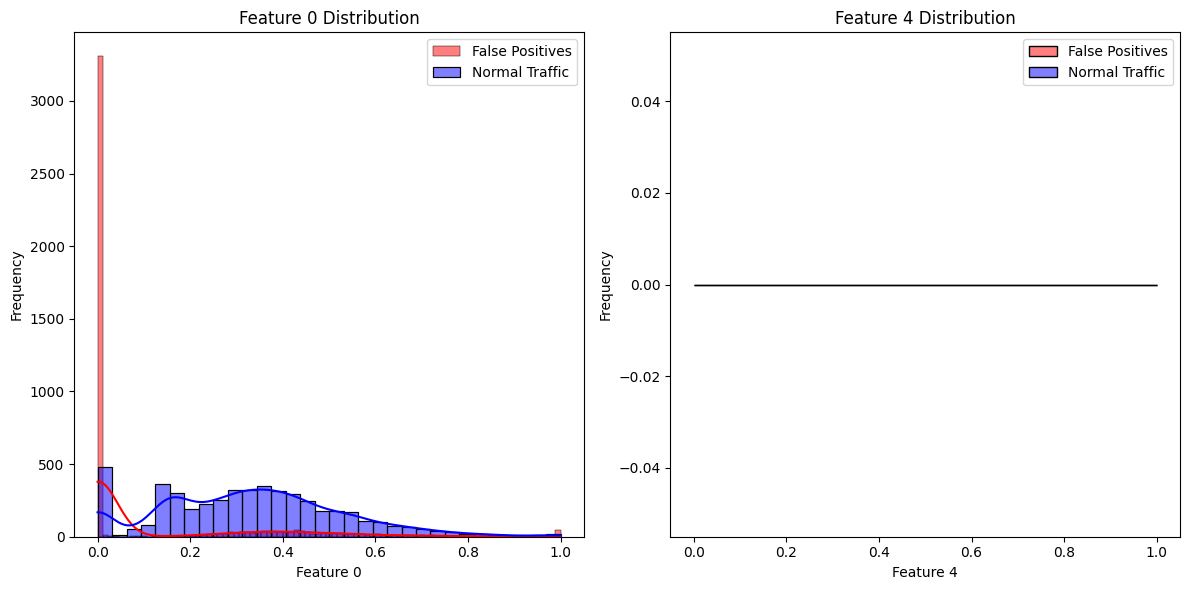

Feature 0 - Mean difference between False Positives and Normal Traffic: -0.2141
Feature 0 tends to have lower values in False Positives than Normal Traffic.
Feature 4 - Mean difference between False Positives and Normal Traffic: nan
Feature 4 tends to have lower values in False Positives than Normal Traffic.
Feature 4 shows the most significant difference between False Positives and Normal Traffic.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for False Positives and Normal Traffic
false_positives = X_test[y_test == 0]  # False positives (normal traffic)
normal_traffic = X_test[y_test == 1]  # Normal traffic (true positives)

# Plot distributions of Feature 0 and Feature 4
plt.figure(figsize=(12, 6))

# Feature 0
plt.subplot(1, 2, 1)
sns.histplot(false_positives.iloc[:, 0], color='red', label='False Positives', kde=True)
sns.histplot(normal_traffic.iloc[:, 0], color='blue', label='Normal Traffic', kde=True)
plt.title('Feature 0 Distribution')
plt.xlabel('Feature 0')
plt.ylabel('Frequency')
plt.legend()

# Feature 4
plt.subplot(1, 2, 2)
sns.histplot(false_positives.iloc[:, 4], color='red', label='False Positives', kde=True)
sns.histplot(normal_traffic.iloc[:, 4], color='blue', label='Normal Traffic', kde=True)
plt.title('Feature 4 Distribution')
plt.xlabel('Feature 4')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Textual Analysis of the Plots

# Feature 0 Analysis:
feature_0_diff = false_positives.iloc[:, 0].mean() - normal_traffic.iloc[:, 0].mean()
print(f"Feature 0 - Mean difference between False Positives and Normal Traffic: {feature_0_diff:.4f}")
if feature_0_diff > 0:
    print("Feature 0 tends to have higher values in False Positives than Normal Traffic.")
else:
    print("Feature 0 tends to have lower values in False Positives than Normal Traffic.")

# Feature 4 Analysis:
feature_4_diff = false_positives.iloc[:, 4].mean() - normal_traffic.iloc[:, 4].mean()
print(f"Feature 4 - Mean difference between False Positives and Normal Traffic: {feature_4_diff:.4f}")
if feature_4_diff > 0:
    print("Feature 4 tends to have higher values in False Positives than Normal Traffic.")
else:
    print("Feature 4 tends to have lower values in False Positives than Normal Traffic.")

# Implication:
if abs(feature_0_diff) > abs(feature_4_diff):
    print("Feature 0 shows the most significant difference between False Positives and Normal Traffic.")
else:
    print("Feature 4 shows the most significant difference between False Positives and Normal Traffic.")

# Next Steps:
# Based on these differences, we could consider applying feature transformation techniques such as:
# - Standardization or scaling (e.g., Min-Max or Z-score normalization)
# - Transformation (e.g., log-transformation) to reduce the impact of outliers or skewness
# - Adding a new feature that represents the absolute difference between Feature 0 and Feature 4

# Let's also explore adding the absolute difference feature between Feature 0 and Feature 4.
X_test['Feature_0_4_diff'] = abs(X_test.iloc[:, 0] - X_test.iloc[:, 4])

# Now we can include this new feature in the training and retrain the model
